In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

In [2]:
df = pd.read_csv("avocado.csv")
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

.

.

In [3]:
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [4]:
df['Unnamed: 0'].value_counts()

0     432
7     432
1     432
11    432
9     432
8     432
10    432
6     432
5     432
4     432
3     432
2     432
41    324
34    324
35    324
36    324
37    324
38    324
39    324
40    324
47    324
42    324
43    324
44    324
45    324
46    324
32    324
48    324
49    324
50    324
33    324
26    324
31    324
30    324
12    324
13    324
14    324
15    324
16    324
17    324
18    324
19    324
20    324
21    324
22    324
23    324
24    324
25    324
27    324
28    324
29    324
51    322
52    107
Name: Unnamed: 0, dtype: int64

In [5]:
import plotly.offline as py
import plotly.graph_objs as go
TYPES = df.groupby('type')['Total Volume'].agg('sum')
values = [TYPES['conventional'],TYPES['organic']]
labels= ['conventional','organic']

graph = go.Pie(labels=labels,values=values)
py.iplot([graph])

#  BY VOLUME A LOT OF CONVENTIONAL ITEMS ARE SOLD = 97%

.

In [6]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [7]:
df['type'] = pd.factorize(df['type'])[0]

In [8]:
df['type'].value_counts()

0    9126
1    9123
Name: type, dtype: int64

<Axes: ylabel='type'>

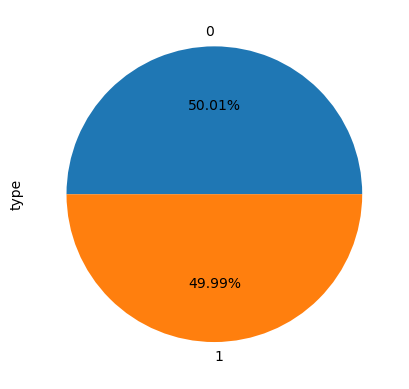

In [9]:
df['type'].value_counts().plot.pie(autopct='%.2f%%')

In [10]:
df['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [11]:
df['region'] = pd.factorize(df['region'])[0]

In [12]:
df['region'].value_counts()

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
51    338
52    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
53    335
Name: region, dtype: int64

.

.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  int64  
 12  year          18249 non-null  int64  
 13  region        18249 non-null  int64  
dtypes: float64(9), int64(4), object(1)
memory usage: 1.9+ MB


In [14]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [15]:
df.describe()

Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   17692.894652   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02       0.000000   
50%    1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03       0.000000   
75%    6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04     132.500000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               type          year        region  
count  18249.000000  18249.000000  18249.000000  
mean       0.499918   2016.147899     26.495644  
std        0.500014      0.939938     15.583788  
min        0.000000   2015.000000      0.000000  
25%        0.000000   2015.000000     13.000000  
50%        0.000000   2016.000000     26.000000  
75%        1.000000   2017.000000     40.000000  
max        1.000000   2018.000000     53.000000

In [16]:
df.skew()

Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

<Axes: >

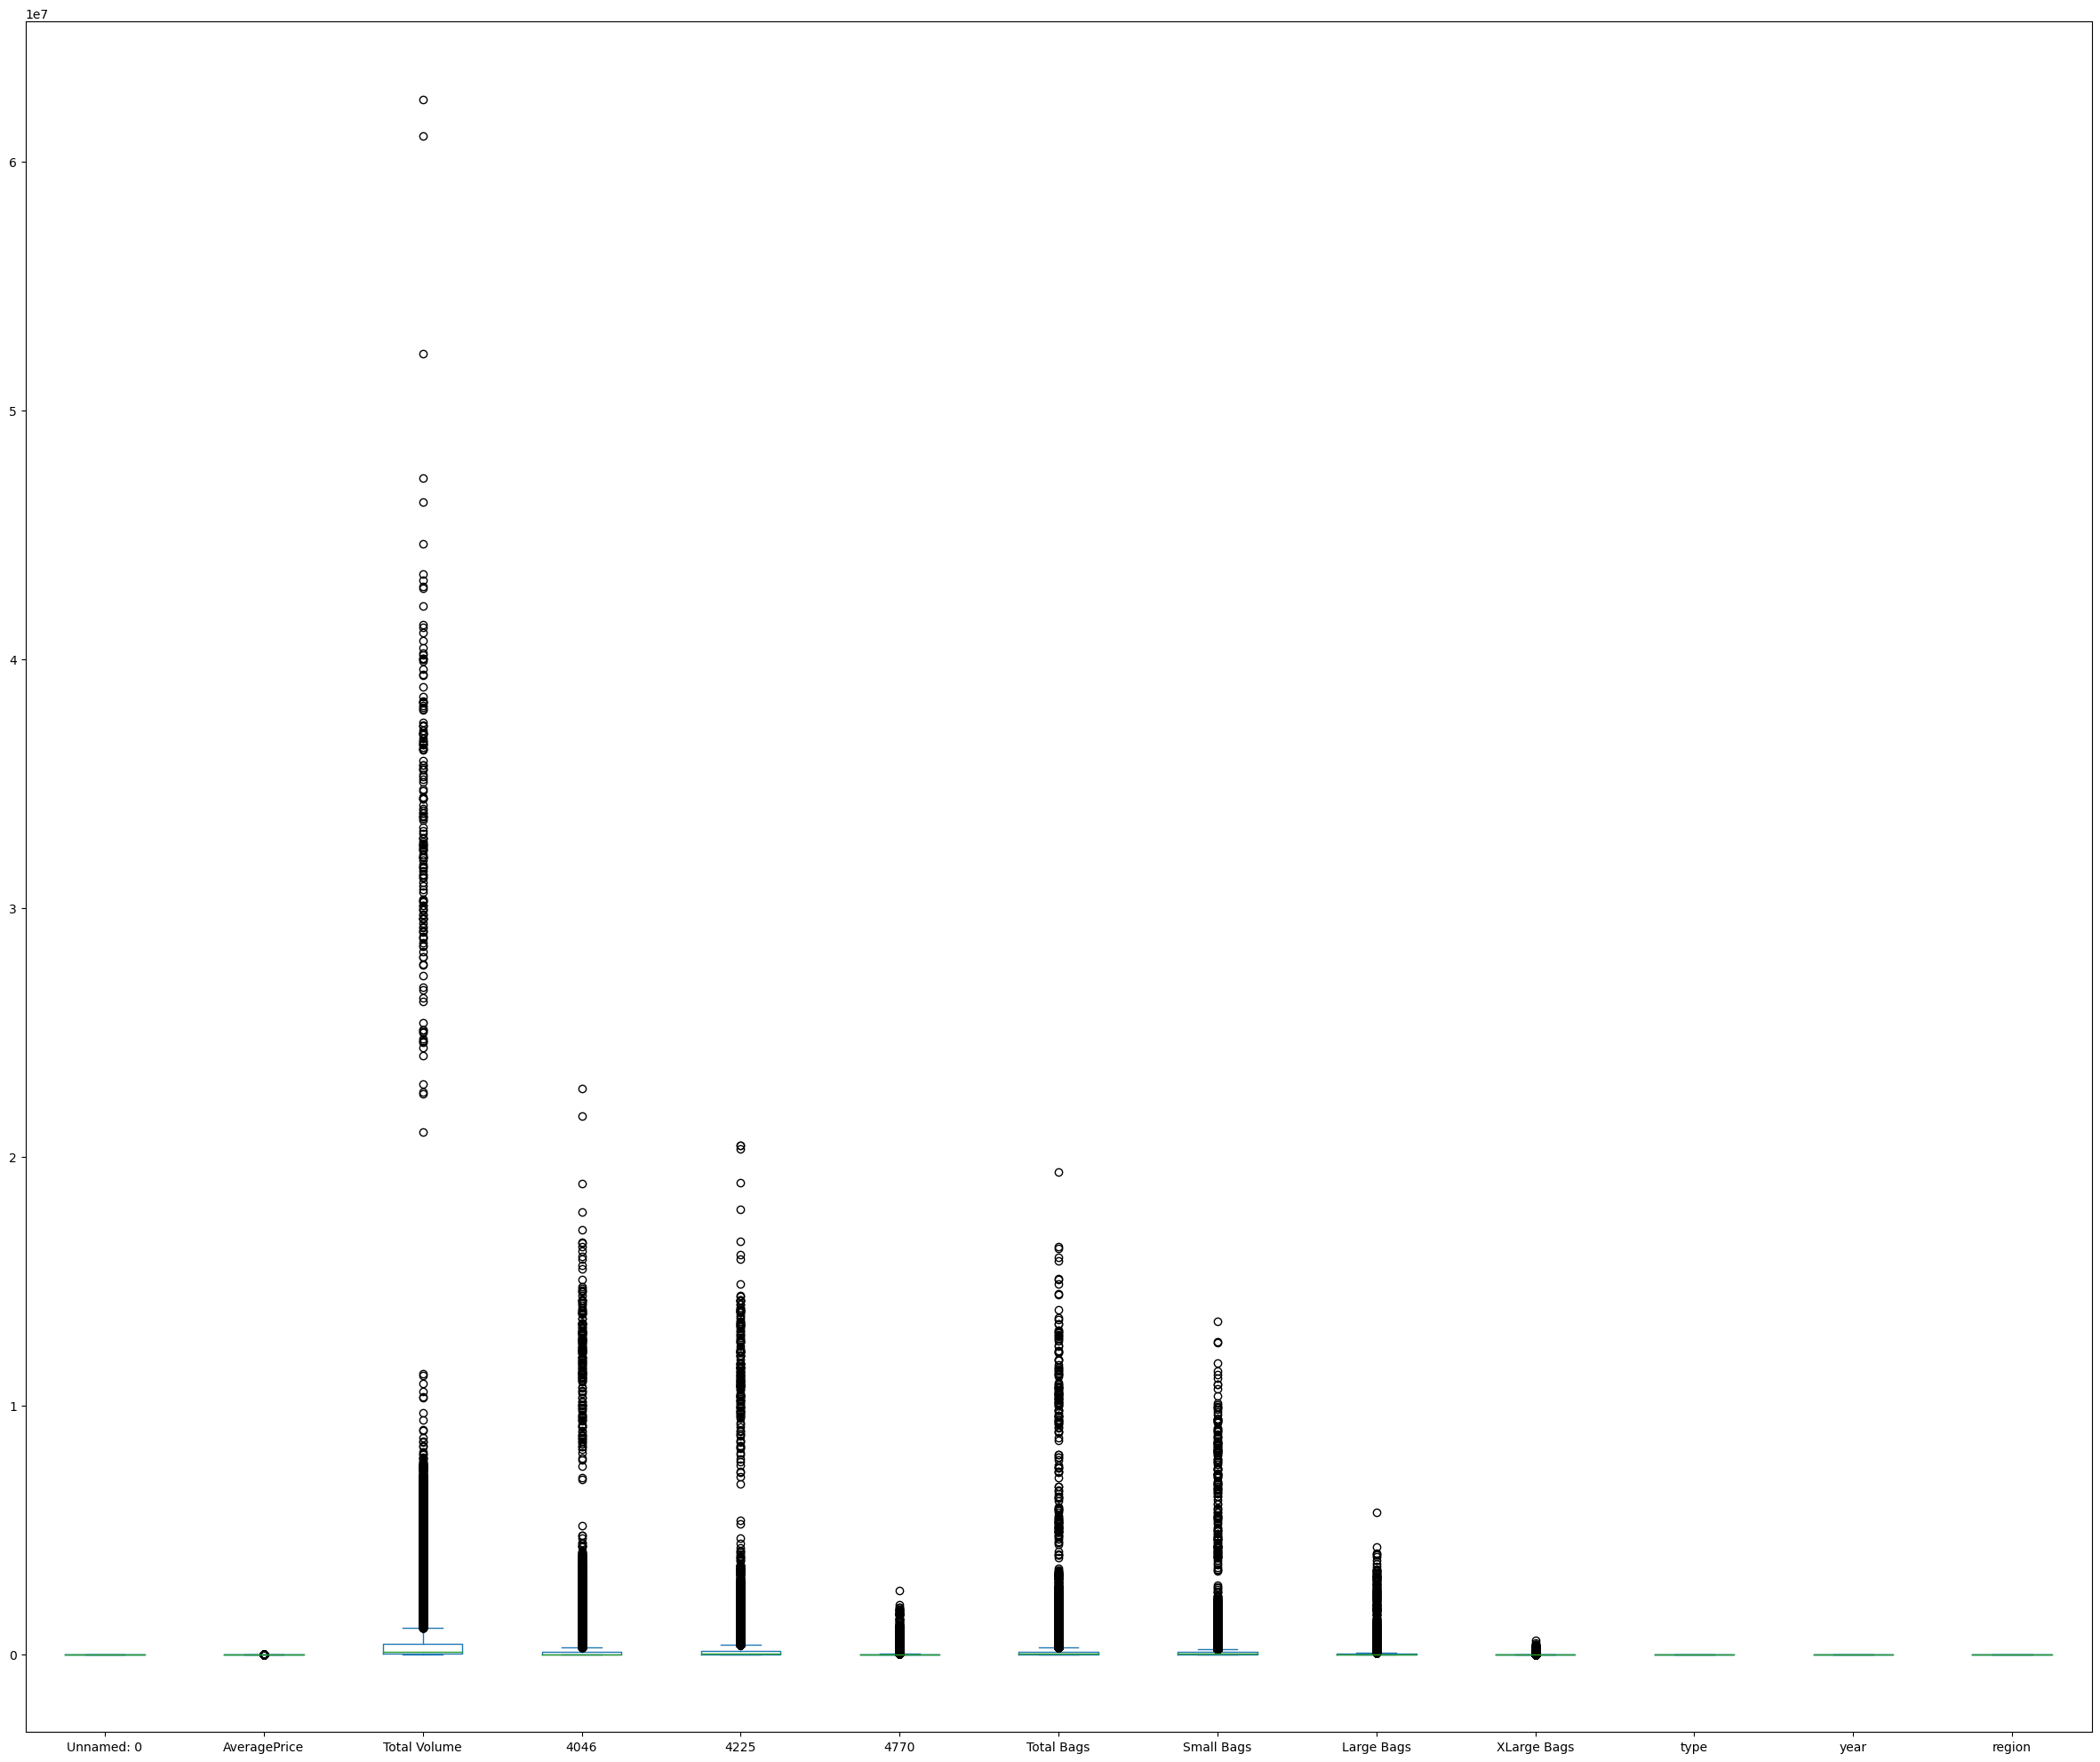

In [17]:
df.plot(kind='box',figsize=(30,25))

## data is highly skewed and way too many outliers are present

.

<Axes: >

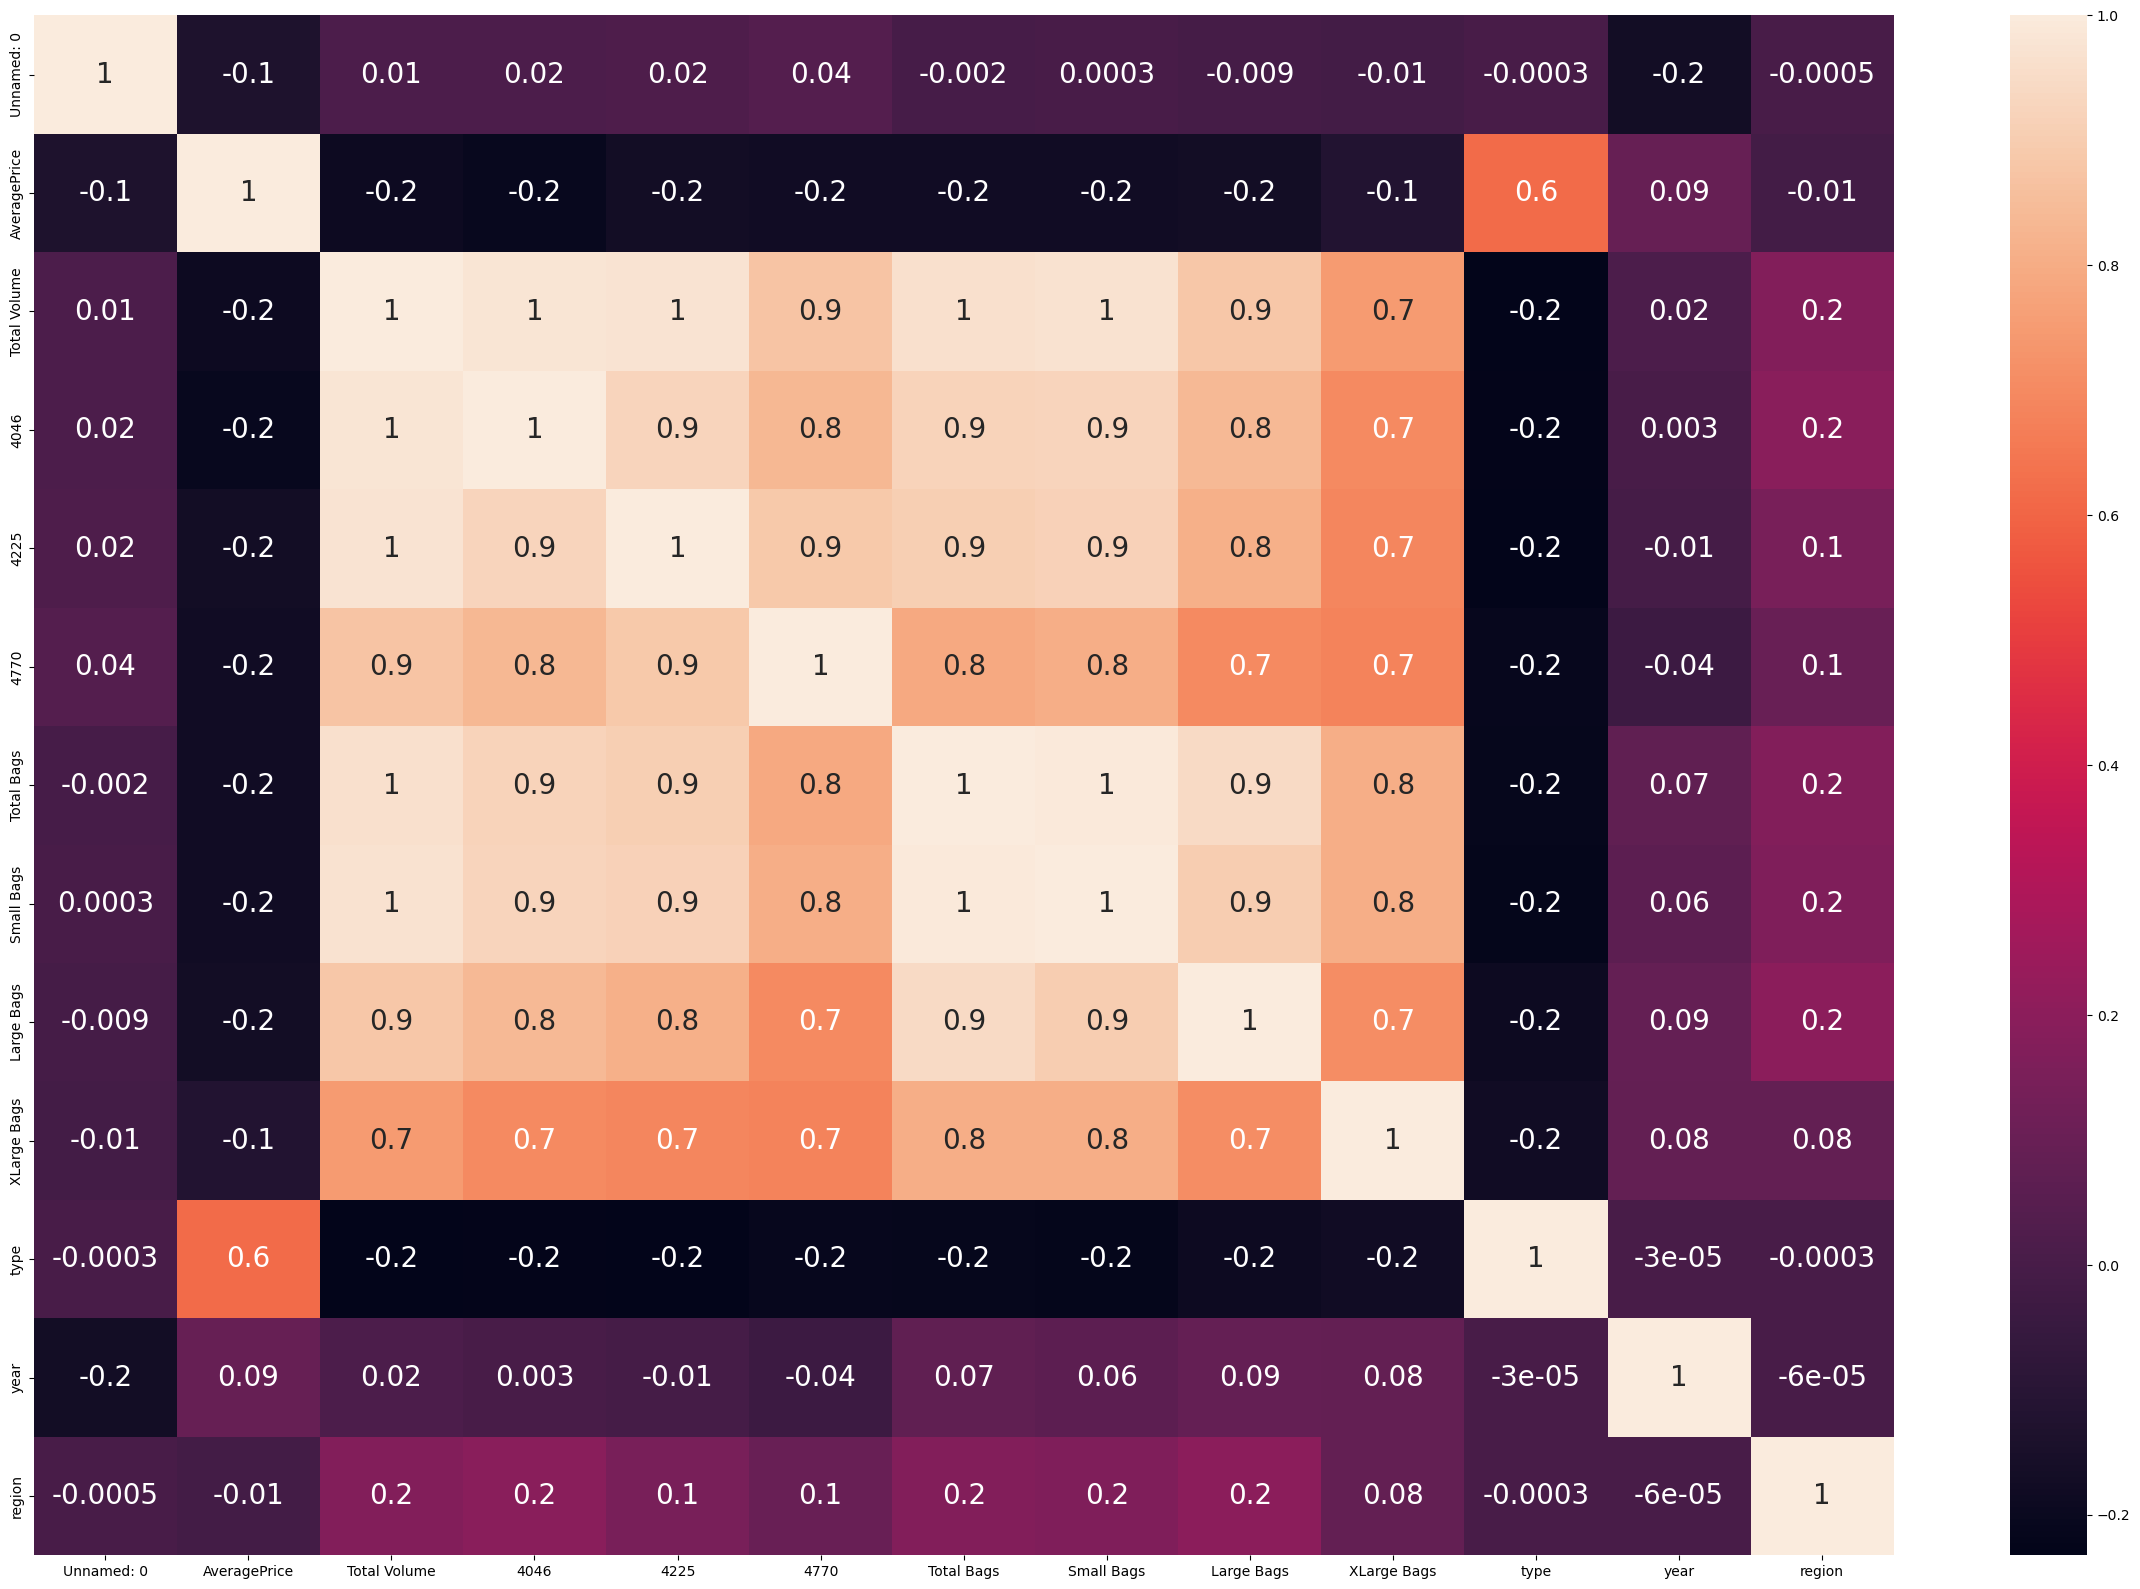

In [18]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),fmt='.1g',annot=True,annot_kws ={'fontsize':20})

.

.

.

In [19]:
del df['Unnamed: 0']

In [20]:
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
df['day'] = df['Date'].dt.day

In [22]:
df['month'] = df['Date'].dt.month

In [23]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  day  \
0     8696.87     8603.62       93.25          0.0     0  2015       0   27   
1     9505.56     9408.07       97.49          0.0     0  2015       0   20   
2     8145.35     8042.21      103.14          0.0     0  2015       0   13   
3     5811.16     5677.40      133.76          0.0     0  2015       0    6   
4     6183.95     5986.26      197.69          0.0     0  2015       0   29   

   month  
0     12  
1     12  
2     12  
3     12  
4     11

In [24]:
df['region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53], dtype=int64)

.

<Axes: xlabel='month', ylabel='AveragePrice'>

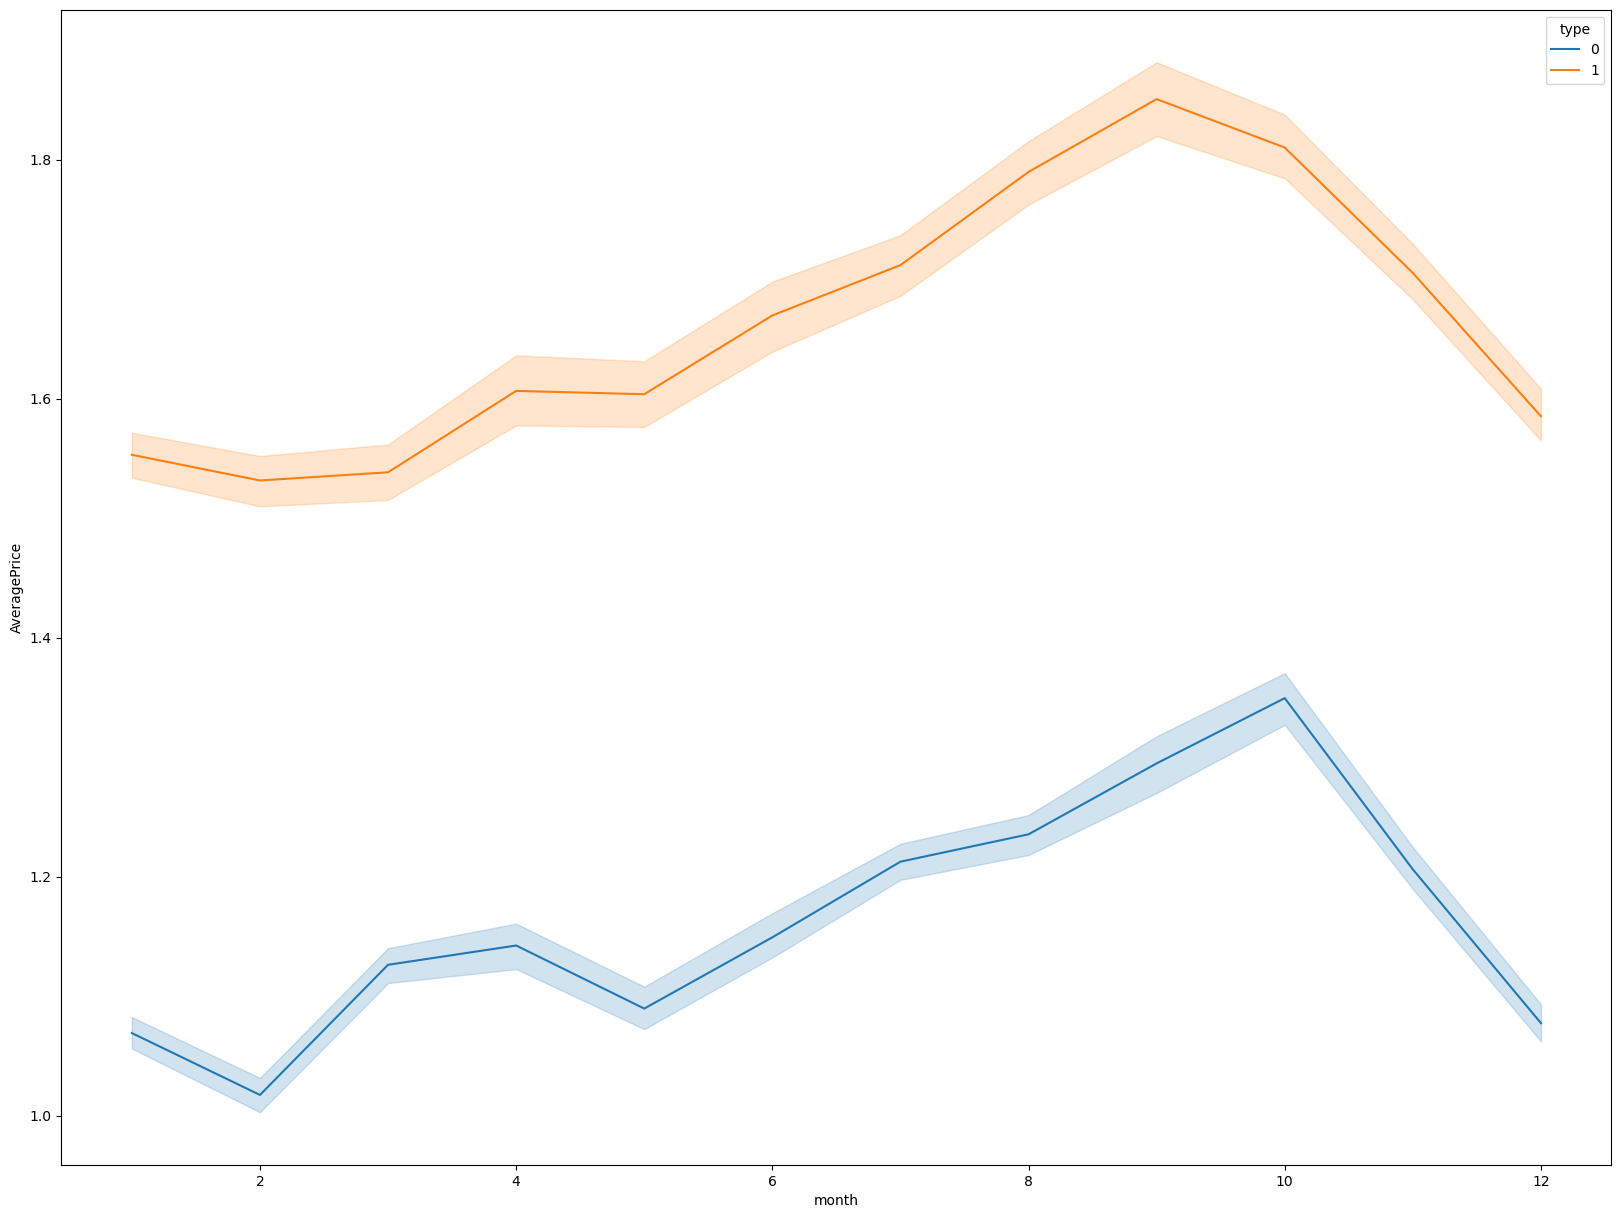

In [25]:
plt.figure(figsize=(20,15))
sns.lineplot(x='month',y='AveragePrice',hue='type',data=df)

<Axes: xlabel='month', ylabel='AveragePrice'>

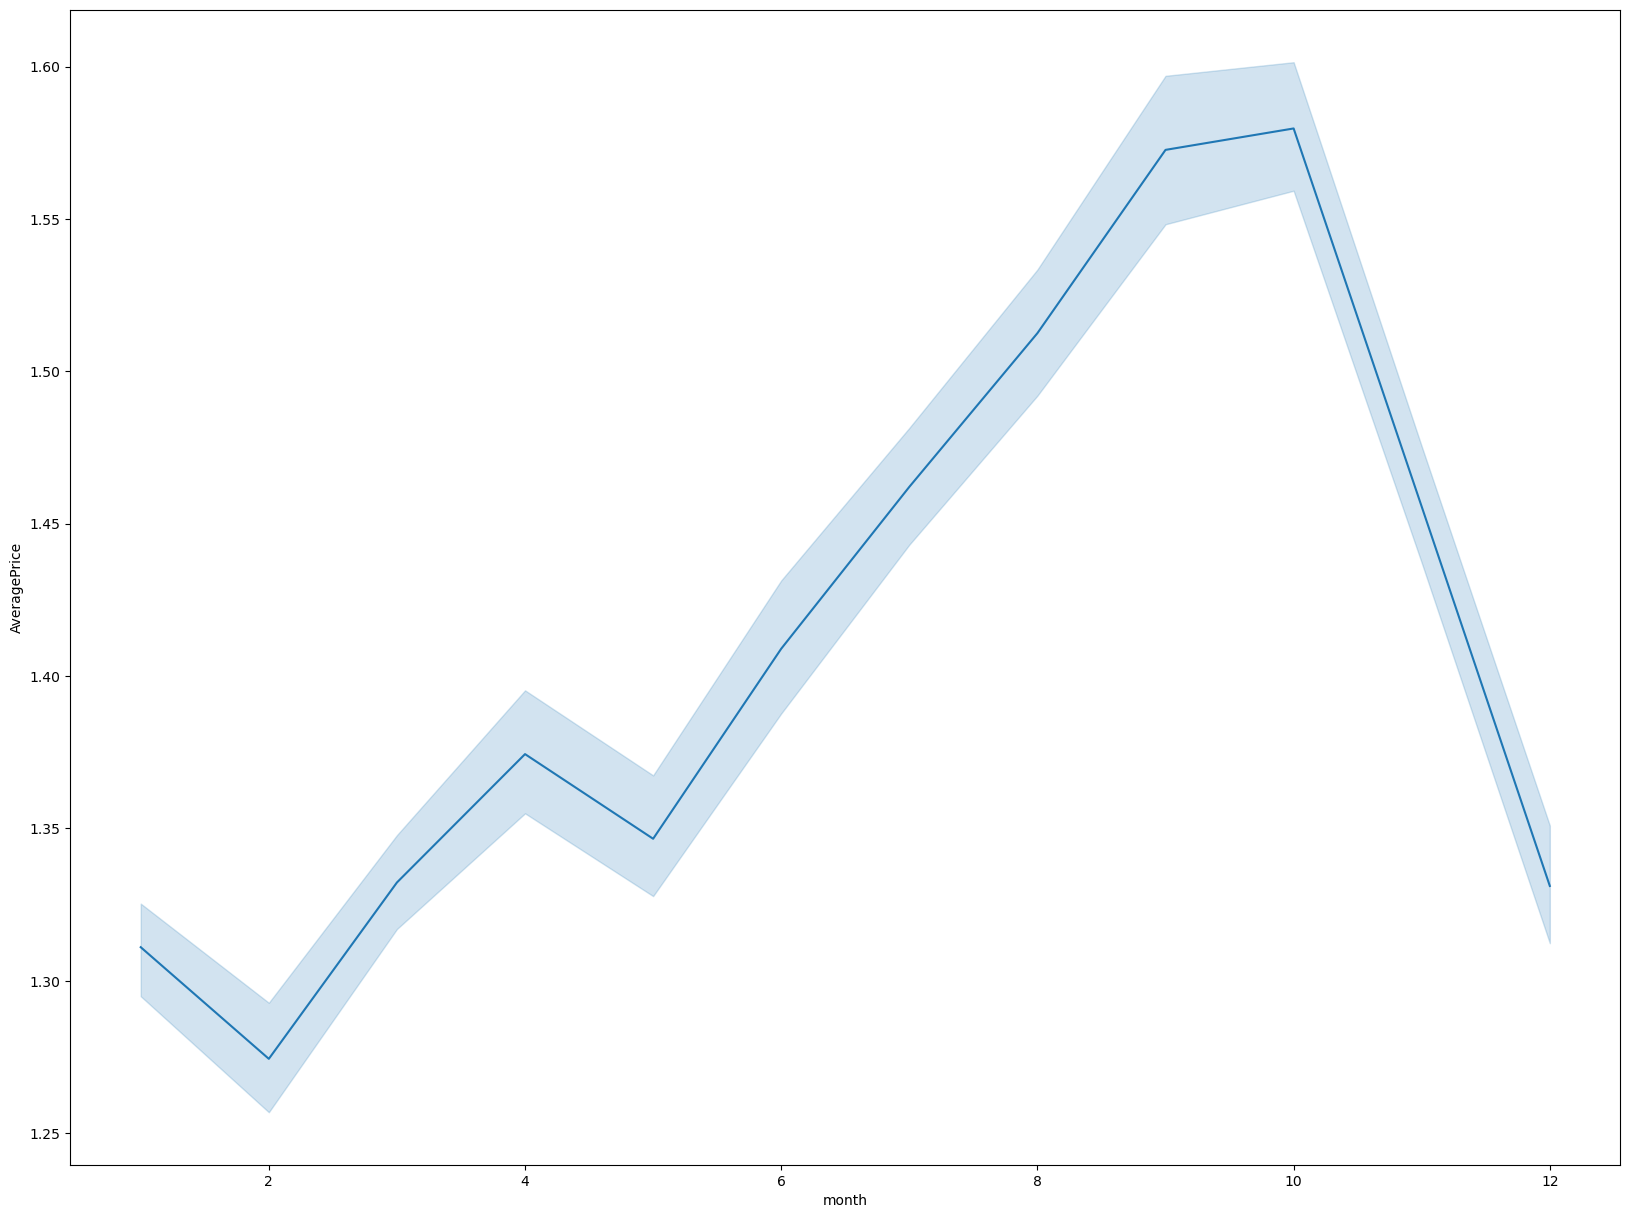

In [26]:
plt.figure(figsize=(20,15))
sns.lineplot(x='month',y='AveragePrice',data=df)

<Axes: xlabel='month', ylabel='Total Volume'>

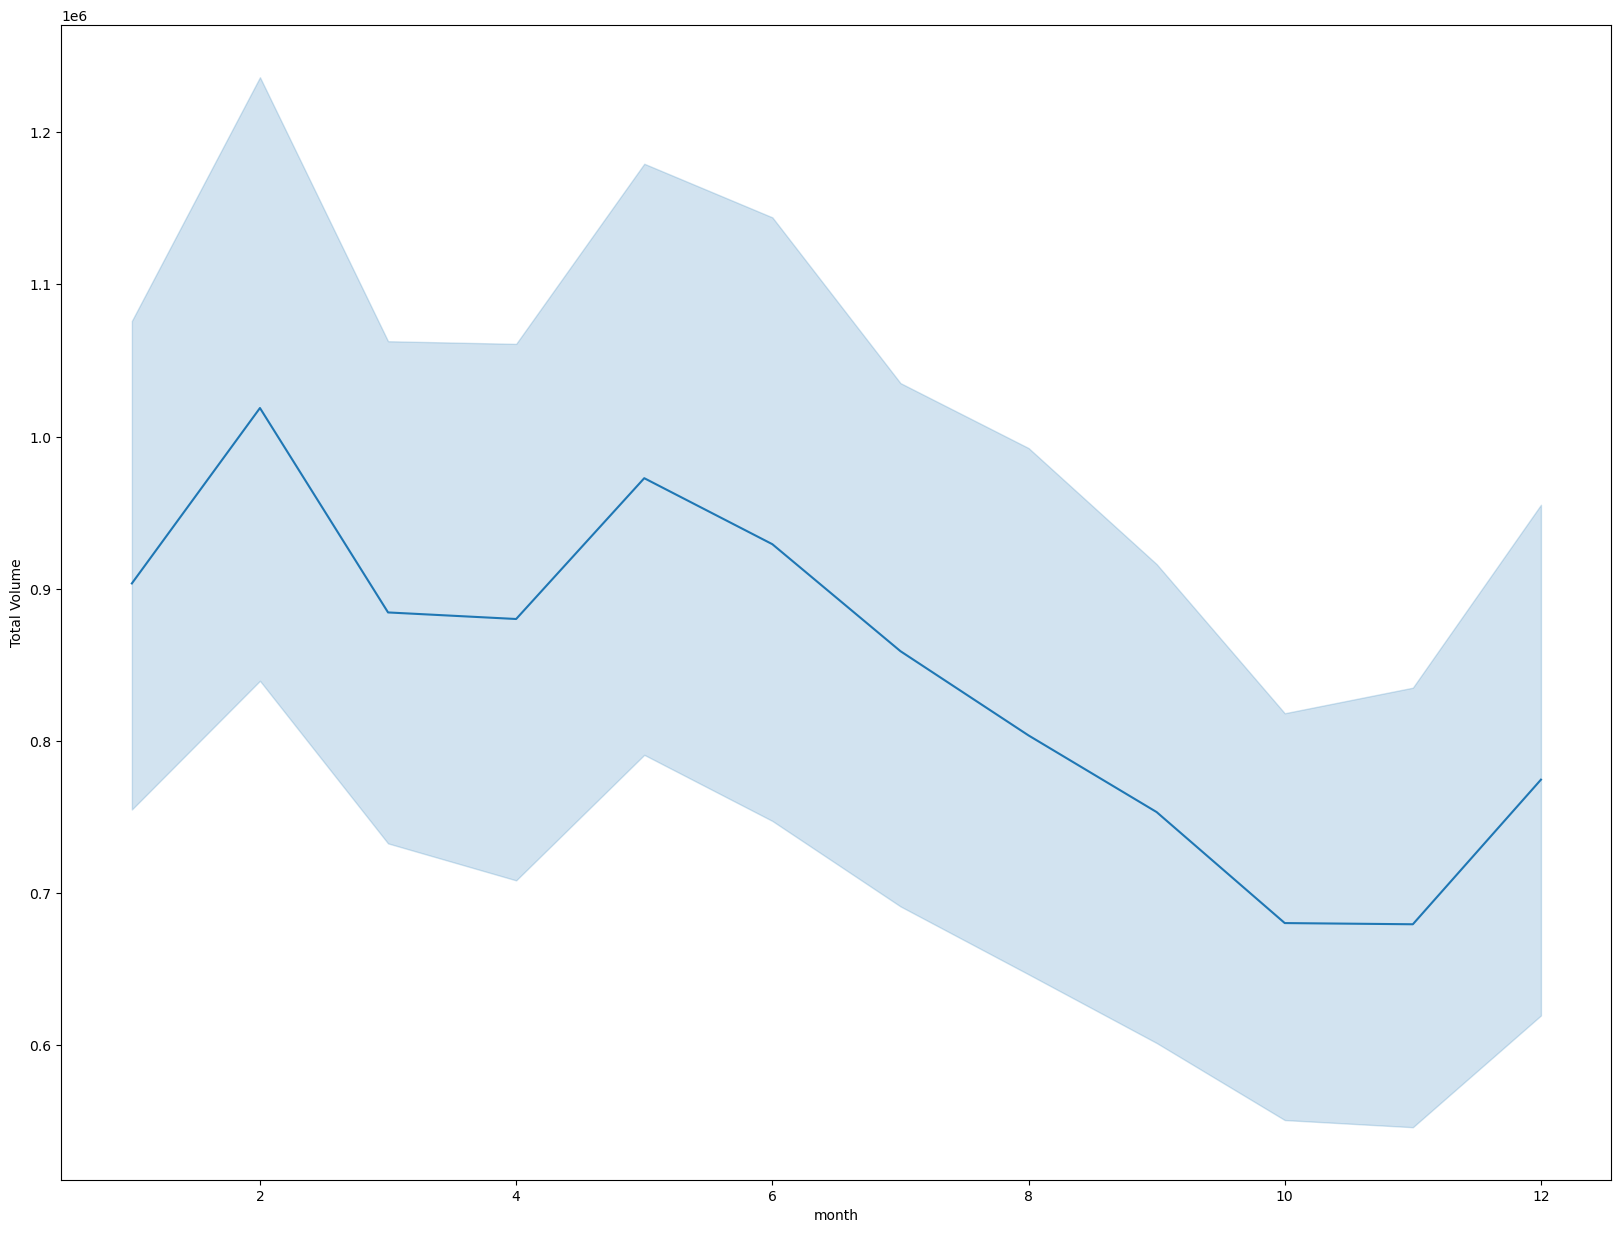

In [27]:
plt.figure(figsize=(20,15))
sns.lineplot(x='month',y='Total Volume',data=df)

<Axes: xlabel='AveragePrice', ylabel='region'>

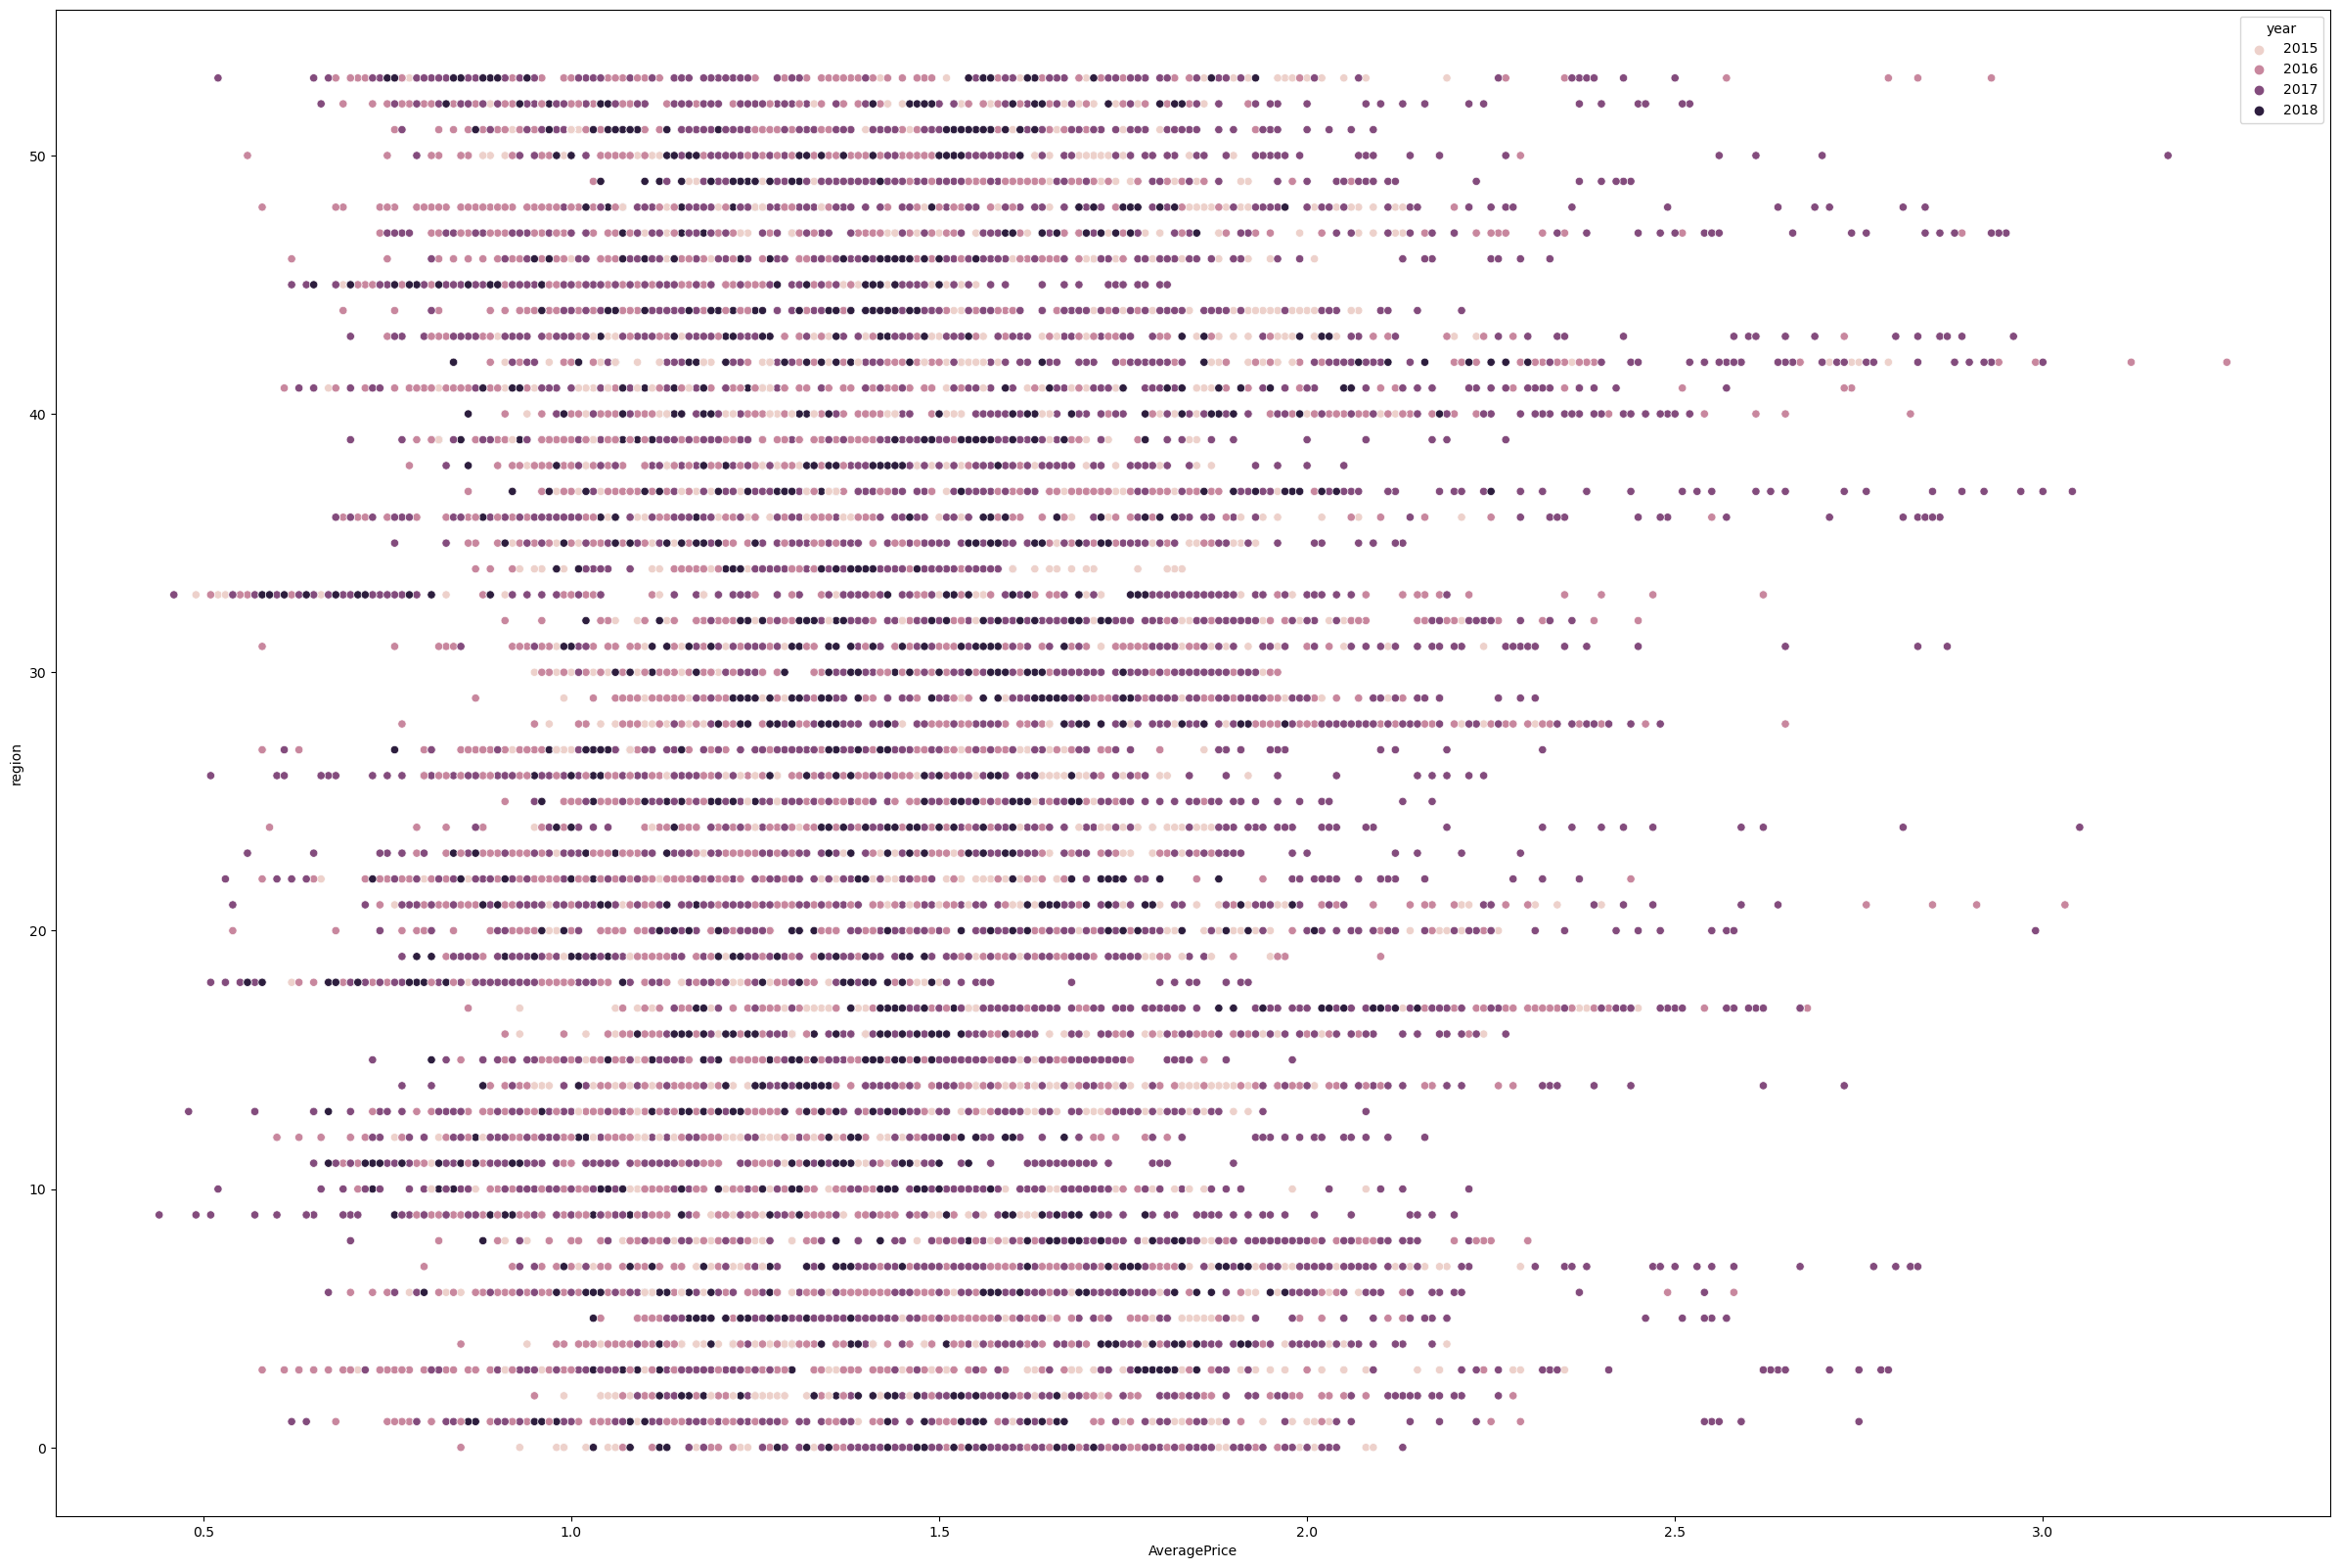

In [28]:
plt.figure(figsize=(30,20))
sns.scatterplot(x='AveragePrice',y='region',data=df, hue='year')

In [29]:
del df['Date']

<Axes: >

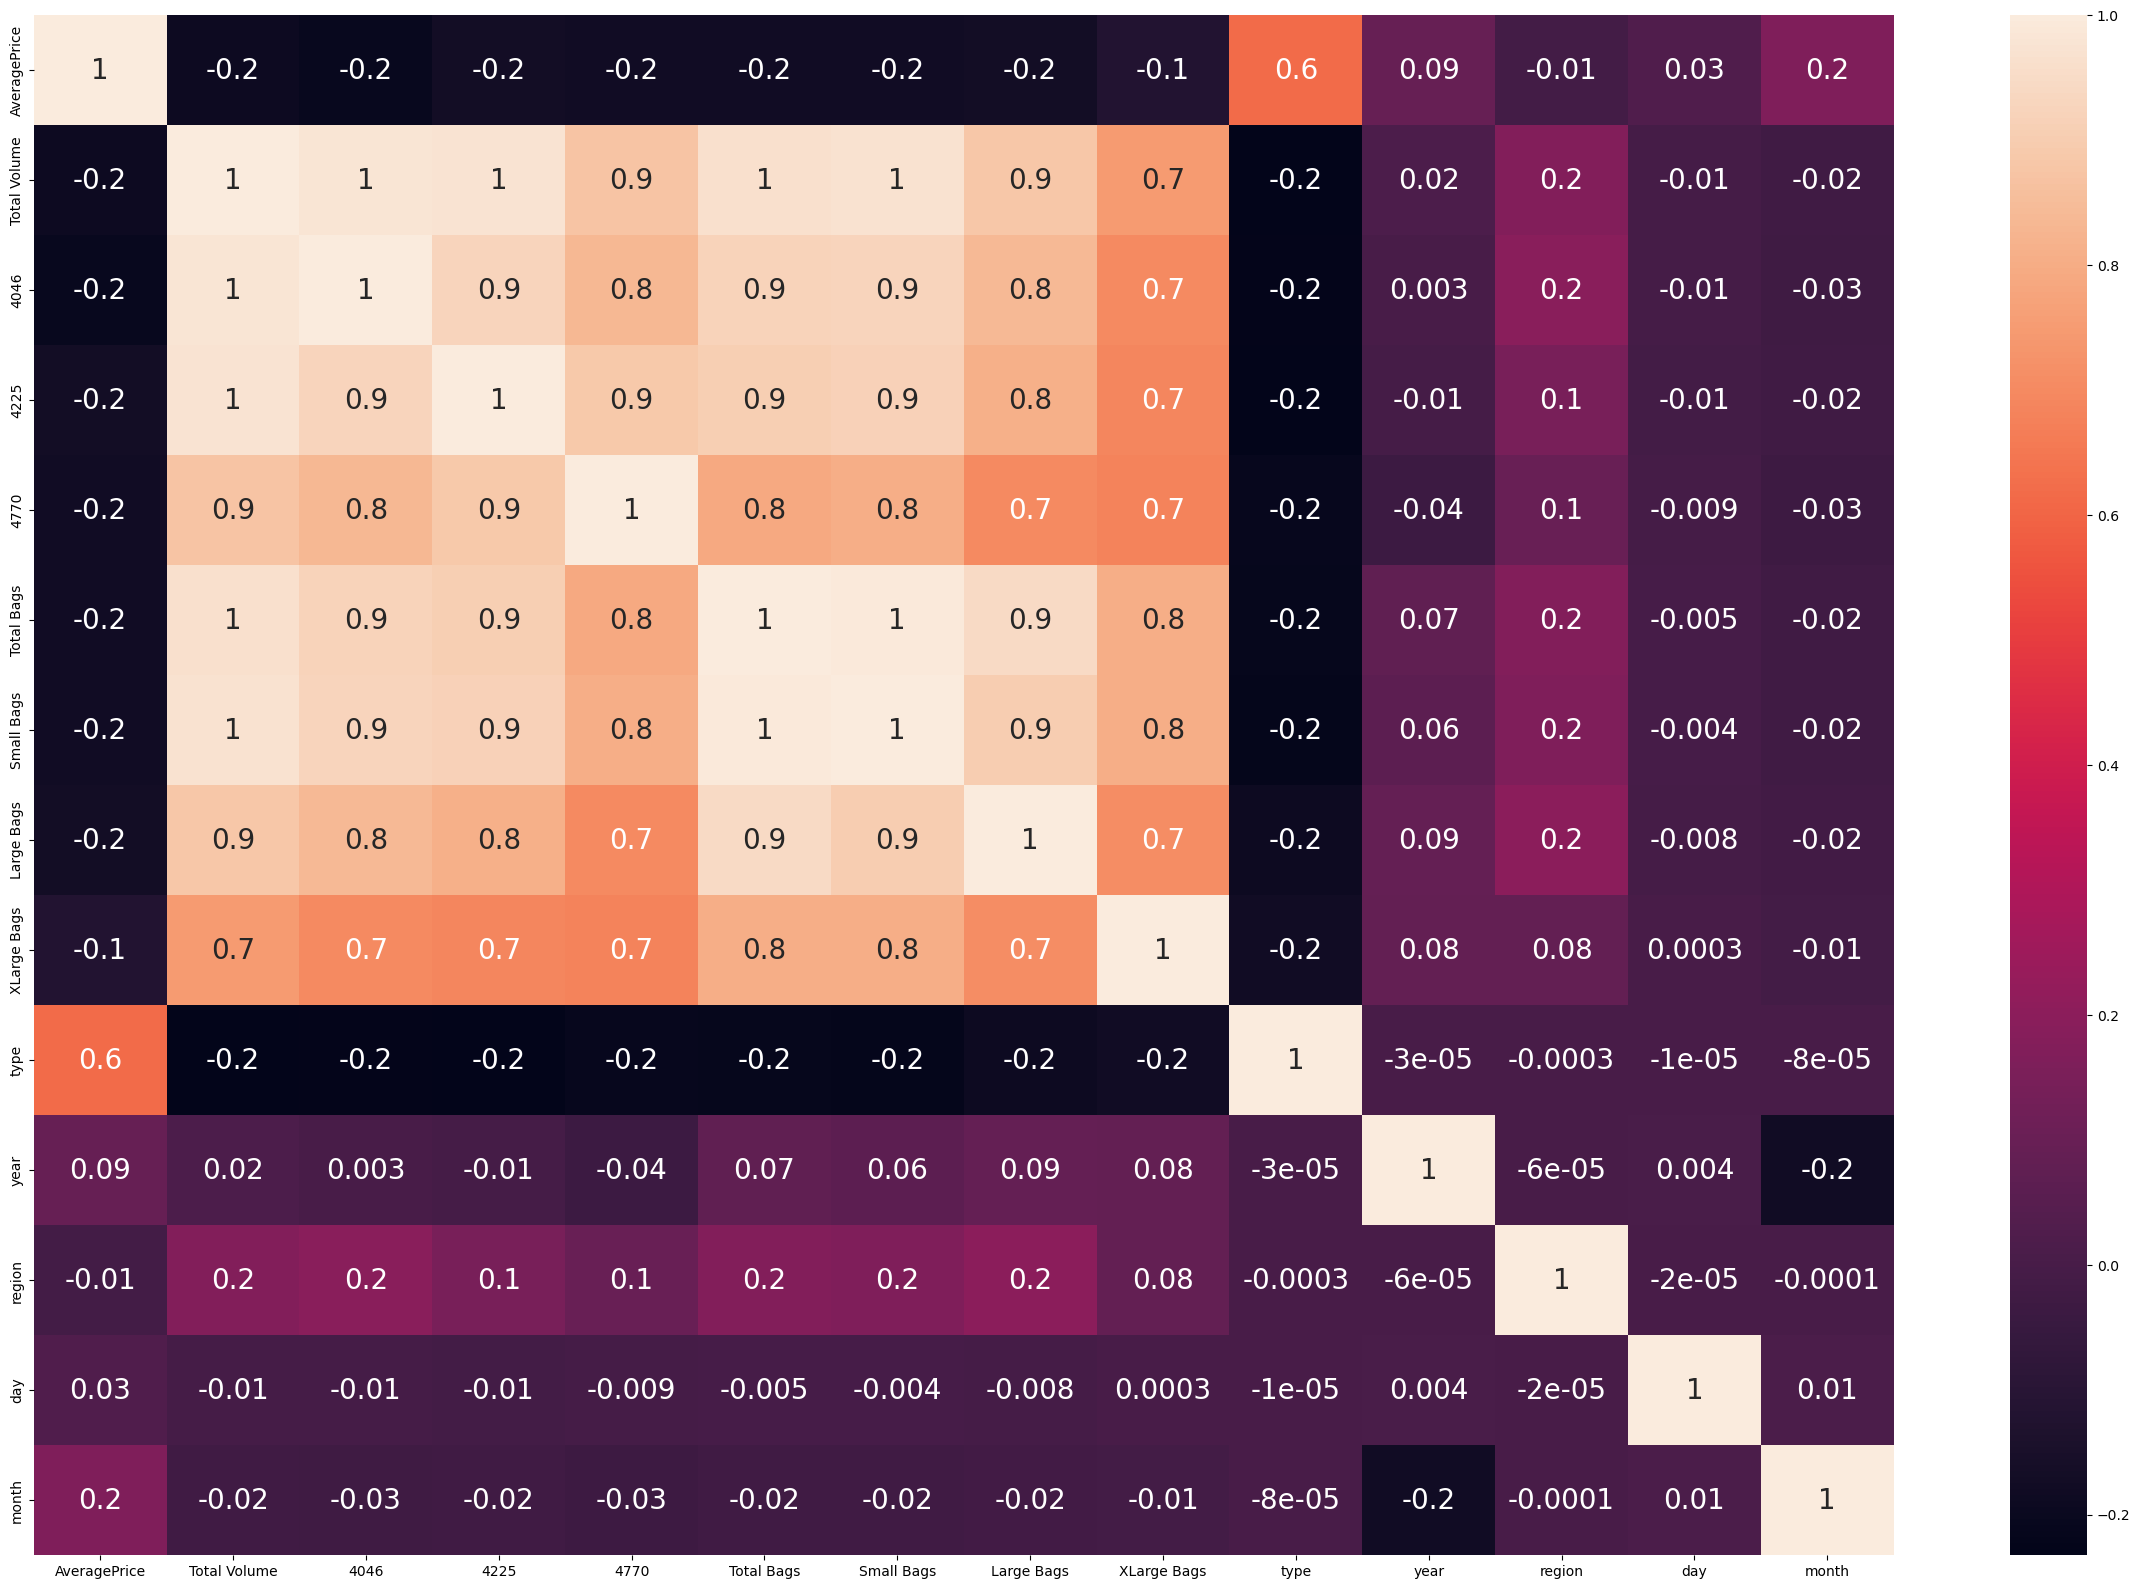

In [30]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),fmt='.1g',annot=True,annot_kws ={'fontsize':20})

In [31]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
day              0.014310
month            0.106617
dtype: float64

In [32]:
df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          type  \
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000   
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507      0.499918   
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.500014   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000      0.000000   
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000      0.000000   
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000      0.000000   
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000      1.000000   
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000      1.000000   

               year        region           day         month  
count  18249.000000  18249.000000  18249.000000  18249.000000  
mean    2016.147899     26.495644     15.662612      6.177215  
std        0.939938     15.583788      8.776281      3.534130  
min     2015.000000      0.000000      1.000000      1.000000  
25%     2015.000000     13.000000      8.000000      3.000000  
50%     2016.000000     26.000000     16.000000      6.000000  
75%     2017.000000     40.000000     23.000000      9.000000  
max     2018.000000     53.000000     31.000000     12.000000

.

.

# Average Price

In [33]:
a=df.iloc[:,1:]
y=df['AveragePrice']

a['Total Volume'] = np.cbrt(a['Total Volume'])
a['Total Volume'] = np.cbrt(a['Total Volume'])

a['4046'] = np.cbrt(a['Total Volume'])
a['4046'] = np.cbrt(a['Total Volume'])

a['4225'] = np.cbrt(a['Total Volume'])
a['4225'] = np.cbrt(a['Total Volume'])

a['4770'] = np.cbrt(a['Total Volume'])
a['4770'] = np.cbrt(a['Total Volume'])

a['Total Bags'] = np.cbrt(a['Total Volume'])
a['Total Bags'] = np.cbrt(a['Total Volume'])

a['Small Bags'] = np.cbrt(a['Total Volume'])
a['Small Bags'] = np.cbrt(a['Total Volume'])

a['Large Bags'] = np.cbrt(a['Total Volume'])
a['Large Bags'] = np.cbrt(a['Total Volume'])

a['XLarge Bags'] = np.cbrt(a['Total Volume'])
a['XLarge Bags'] = np.cbrt(a['Total Volume'])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(a)

x = scaler.transform(a)


x= pd.DataFrame(x, columns=a.columns)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30 ,random_state=42)

x_train_sca=x_train
x_test_sca=x_test

.

In [34]:
x_train_sca.describe()

Total Volume          4046          4225          4770    Total Bags  \
count  12774.000000  12774.000000  12774.000000  12774.000000  12774.000000   
mean       0.004034      0.003907      0.003907      0.003907      0.003907   
std        1.001854      1.001407      1.001407      1.001407      1.001407   
min       -1.804730     -2.146546     -2.146546     -2.146546     -2.146546   
25%       -0.877187     -0.884949     -0.884949     -0.884949     -0.884949   
50%       -0.001214      0.084037      0.084037      0.084037      0.084037   
75%        0.636716      0.700634      0.700634      0.700634      0.700634   
max        3.803861      3.113599      3.113599      3.113599      3.113599   

         Small Bags    Large Bags   XLarge Bags          type          year  \
count  12774.000000  12774.000000  12774.000000  12774.000000  12774.000000   
mean       0.003907      0.003907      0.003907     -0.002967      0.001145   
std        1.001407      1.001407      1.001407      1.000034      1.001035   
min       -2.146546     -2.146546     -2.146546     -0.999836     -1.221282   
25%       -0.884949     -0.884949     -0.884949     -0.999836     -1.221282   
50%        0.084037      0.084037      0.084037     -0.999836     -0.157353   
75%        0.700634      0.700634      0.700634      1.000164      0.906575   
max        3.113599      3.113599      3.113599      1.000164      1.970504   

             region           day         month  
count  12774.000000  12774.000000  12774.000000  
mean       0.003575     -0.008574      0.004214  
std        1.001498      0.999117      0.999641  
min       -1.700252     -1.670755     -1.464959  
25%       -0.866029     -0.873129     -0.899034  
50%        0.032365     -0.075502     -0.050145  
75%        0.866588      0.836070      0.798743  
max        1.700811      1.747643      1.647632

<Axes: >

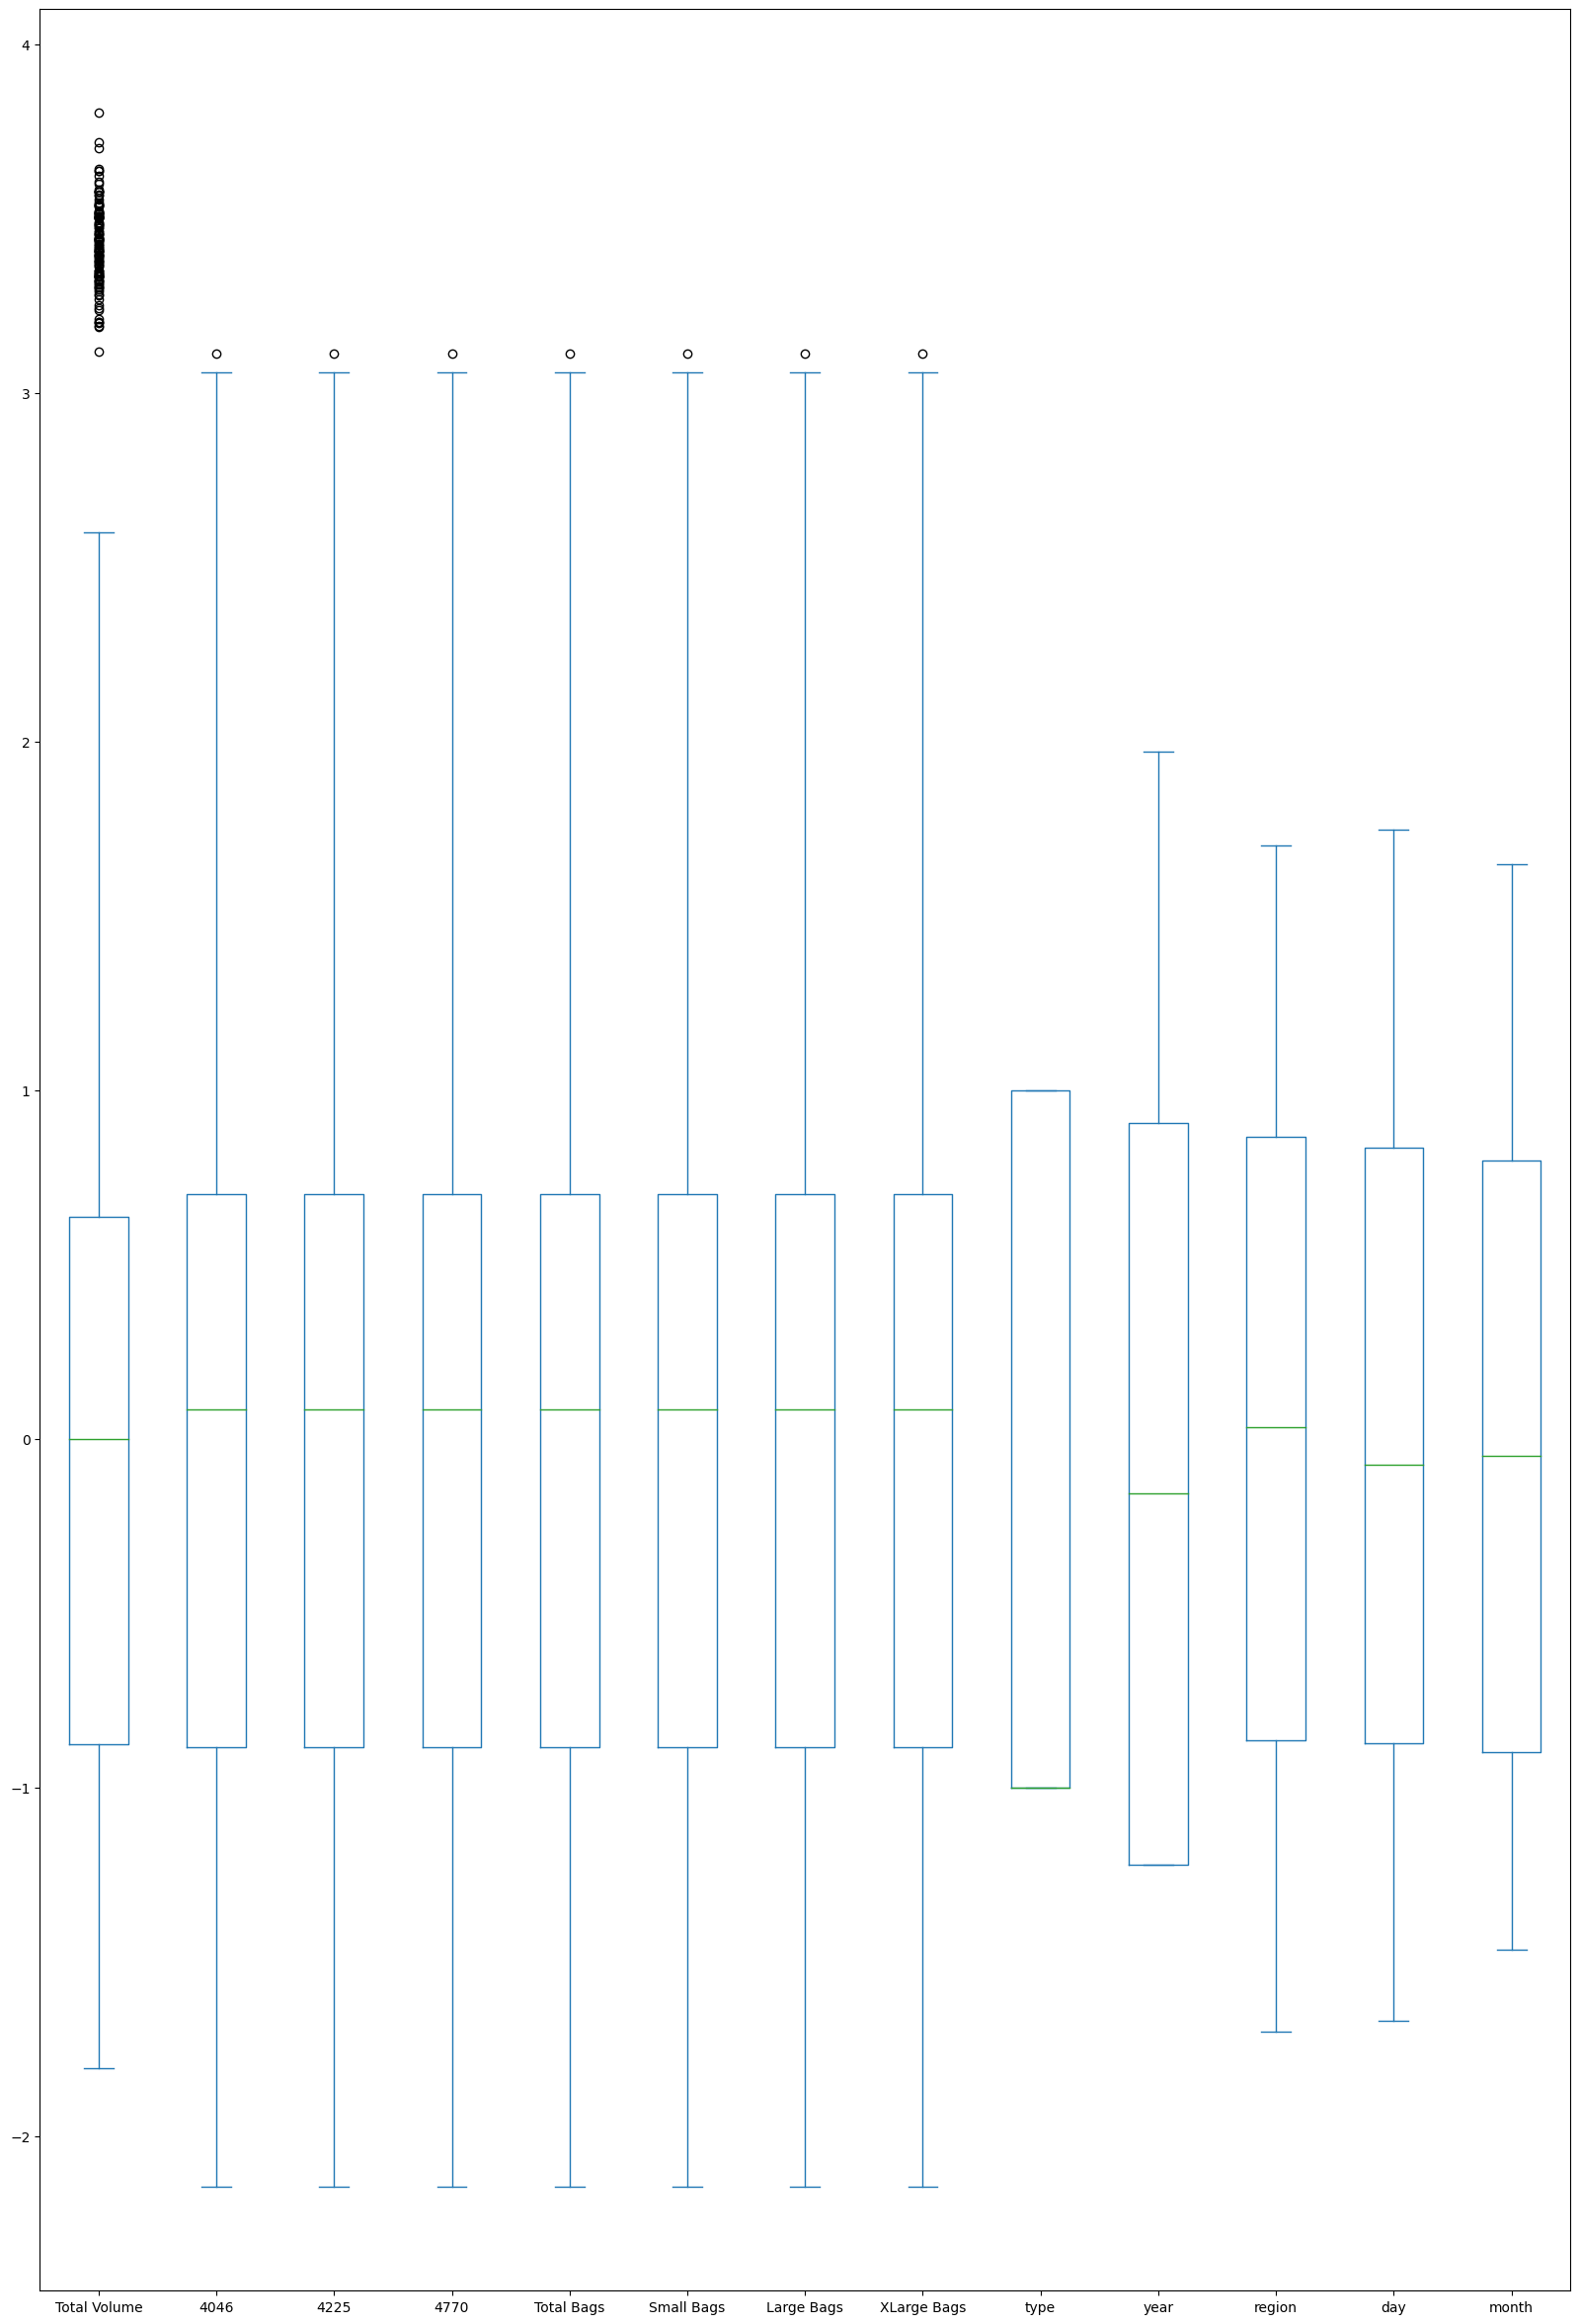

In [35]:
x_train_sca.plot(kind='box',figsize=(20,30))

.

.

In [36]:
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
from sklearn.metrics import accuracy_score , confusion_matrix

.

.

# SVR

0.5326665084127935
RMSE : 0.27458835961336064


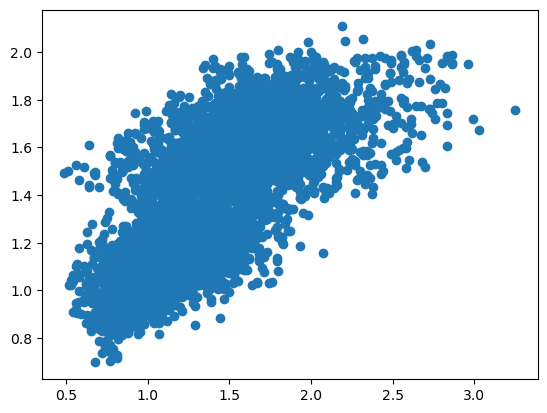

In [38]:
svm = SVR()
svm.fit(x_train_sca,y_train)
y_pred1 = svm.predict(x_test_sca)
svm1 = metrics.r2_score(y_test,y_pred1)
print(svm1)
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_pred1)))

plt.scatter(x=y_test,y=y_pred1)

.

.

# LinearRegression

0.4314830618003367
RMSE : 0.3028589231641286


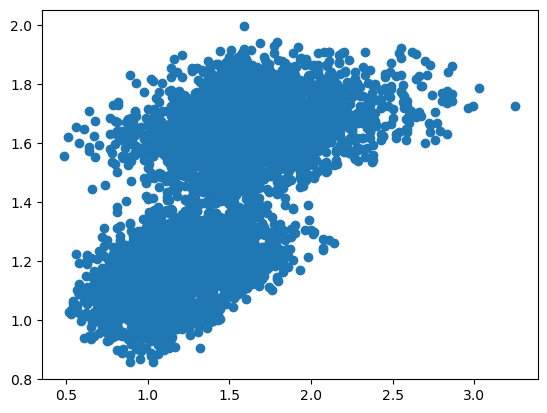

In [39]:
lr= LinearRegression()
lr.fit(x_train_sca,y_train)
y_pred2 = lr.predict(x_test_sca)
lr2 = metrics.r2_score(y_test,y_pred2)
print(lr2)
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))

plt.scatter(x=y_test,y=y_pred2)

.

.

# RandomForestRegressor

In [40]:
rfr= RandomForestRegressor()
rfr.fit(x_train_sca,y_train)
y_pred3 = rfr.predict(x_test_sca)
rfr3 = metrics.r2_score(y_test,y_pred3)
print(rfr3)
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_pred3)))

0.8754224835321535
RMSE : 0.14177135949338548


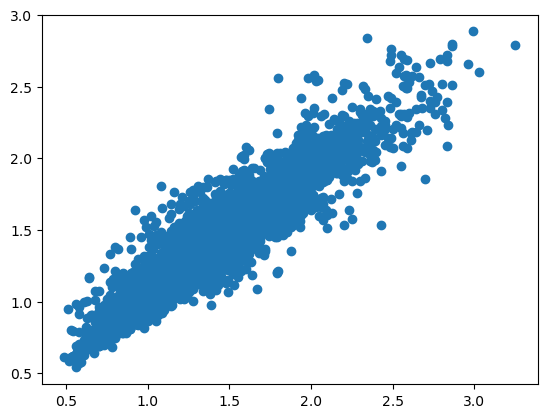

In [41]:
plt.scatter(x=y_test,y=y_pred3)

In [42]:
rfr= RandomForestRegressor(max_samples=0.75,max_depth=50,
            max_features=15,
            min_samples_split=4,
            n_estimators=300,criterion='squared_error',random_state=42)
rfr.fit(x_train_sca,y_train)
y_pred3 = rfr.predict(x_test_sca)
rfr3 = metrics.r2_score(y_test,y_pred3)
print(rfr3)
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_pred3)))

0.8682967005747331
RMSE : 0.14576961177748649


.

.

.

# GradientBoostingRegressor

In [43]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train_sca,y_train)
y_pred4= gbr.predict(x_test_sca)
gbr4 = metrics.r2_score(y_test,y_pred4)
print(gbr4)
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_pred4)))

0.6900332564669803
RMSE : 0.2236280207221759


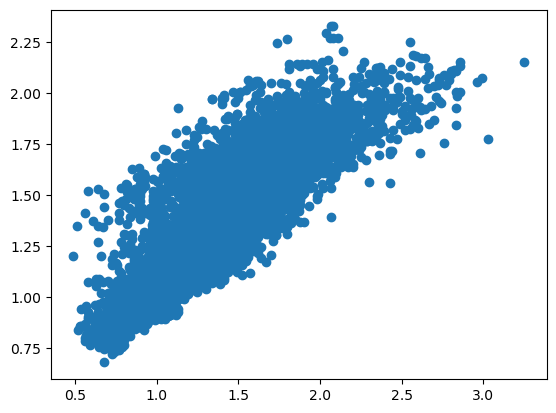

In [44]:
plt.scatter(x=y_test,y=y_pred4)

.

.

# DecisionTreeRegressor

In [45]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train_sca,y_train)
y_pred5= dtr.predict(x_test_sca)
dtr5 = metrics.r2_score(y_test,y_pred5)
print(dtr5)
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_pred5)))

0.7868867152552673
RMSE : 0.18542740951896308


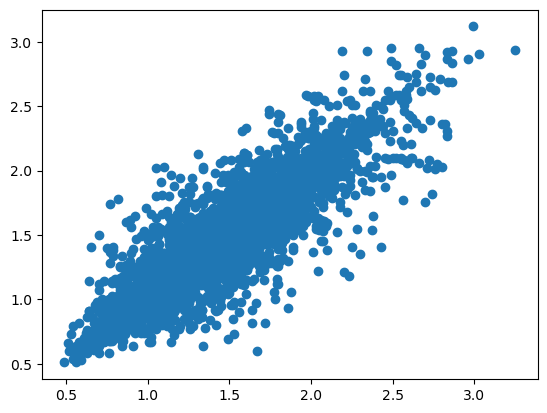

In [46]:
plt.scatter(x=y_test,y=y_pred5)

.

.

.

.

# Random Forest resgressor is the best

In [47]:
average_price = pd.DataFrame({'Test':y_test,'Prediction':y_pred3})
average_price.head(50)

Test  Prediction
8604   0.82    0.902276
2608   0.97    1.009338
14581  1.44    1.519598
4254   0.97    0.901514
16588  1.45    1.483589
13954  1.29    1.409575
17460  2.03    1.956085
5504   0.94    0.947429
17253  2.45    2.230946
7801   1.83    1.686171
3857   1.35    1.318149
12571  1.37    1.321230
852    1.07    1.110271
11474  1.51    1.438170
3502   1.15    1.158356
13825  1.58    1.704758
12599  0.66    0.863923
13505  1.58    1.645334
4220   1.48    1.328825
3753   1.00    1.124750
16452  1.62    1.747329
12401  1.73    1.562191
8610   0.73    0.797414
11570  1.59    1.797387
16987  2.57    2.555374
17843  1.53    1.736993
8000   1.00    0.980073
10411  1.81    1.737261
11434  2.00    1.907375
5025   1.06    0.949532
14343  1.65    1.490996
10319  1.29    1.302181
17303  2.84    2.171101
9341   1.22    1.374475
7439   1.29    1.319303
7058   1.46    1.595661
14711  1.99    1.767005
13328  1.53    1.470194
13631  1.87    1.861464
16793  1.04    1.254115
2167   1.11    1.110364
17161  1.31    1.190177
8922   1.24    1.141548
10909  1.47    1.556400
5309   1.29    1.199968
708    0.95    1.065442
326    1.14    1.089538
10764  1.87    1.900888
7021   0.90    1.059243
6850   1.73    1.684924

.

.

# Region Selection

In [48]:
df.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  year  region  day  month  
0     8603.62       93.25          0.0     0  2015       0   27     12  
1     9408.07       97.49          0.0     0  2015       0   20     12  
2     8042.21      103.14          0.0     0  2015       0   13     12  
3     5677.40      133.76          0.0     0  2015       0    6     12  
4     5986.26      197.69          0.0     0  2015       0   29     11

<Axes: >

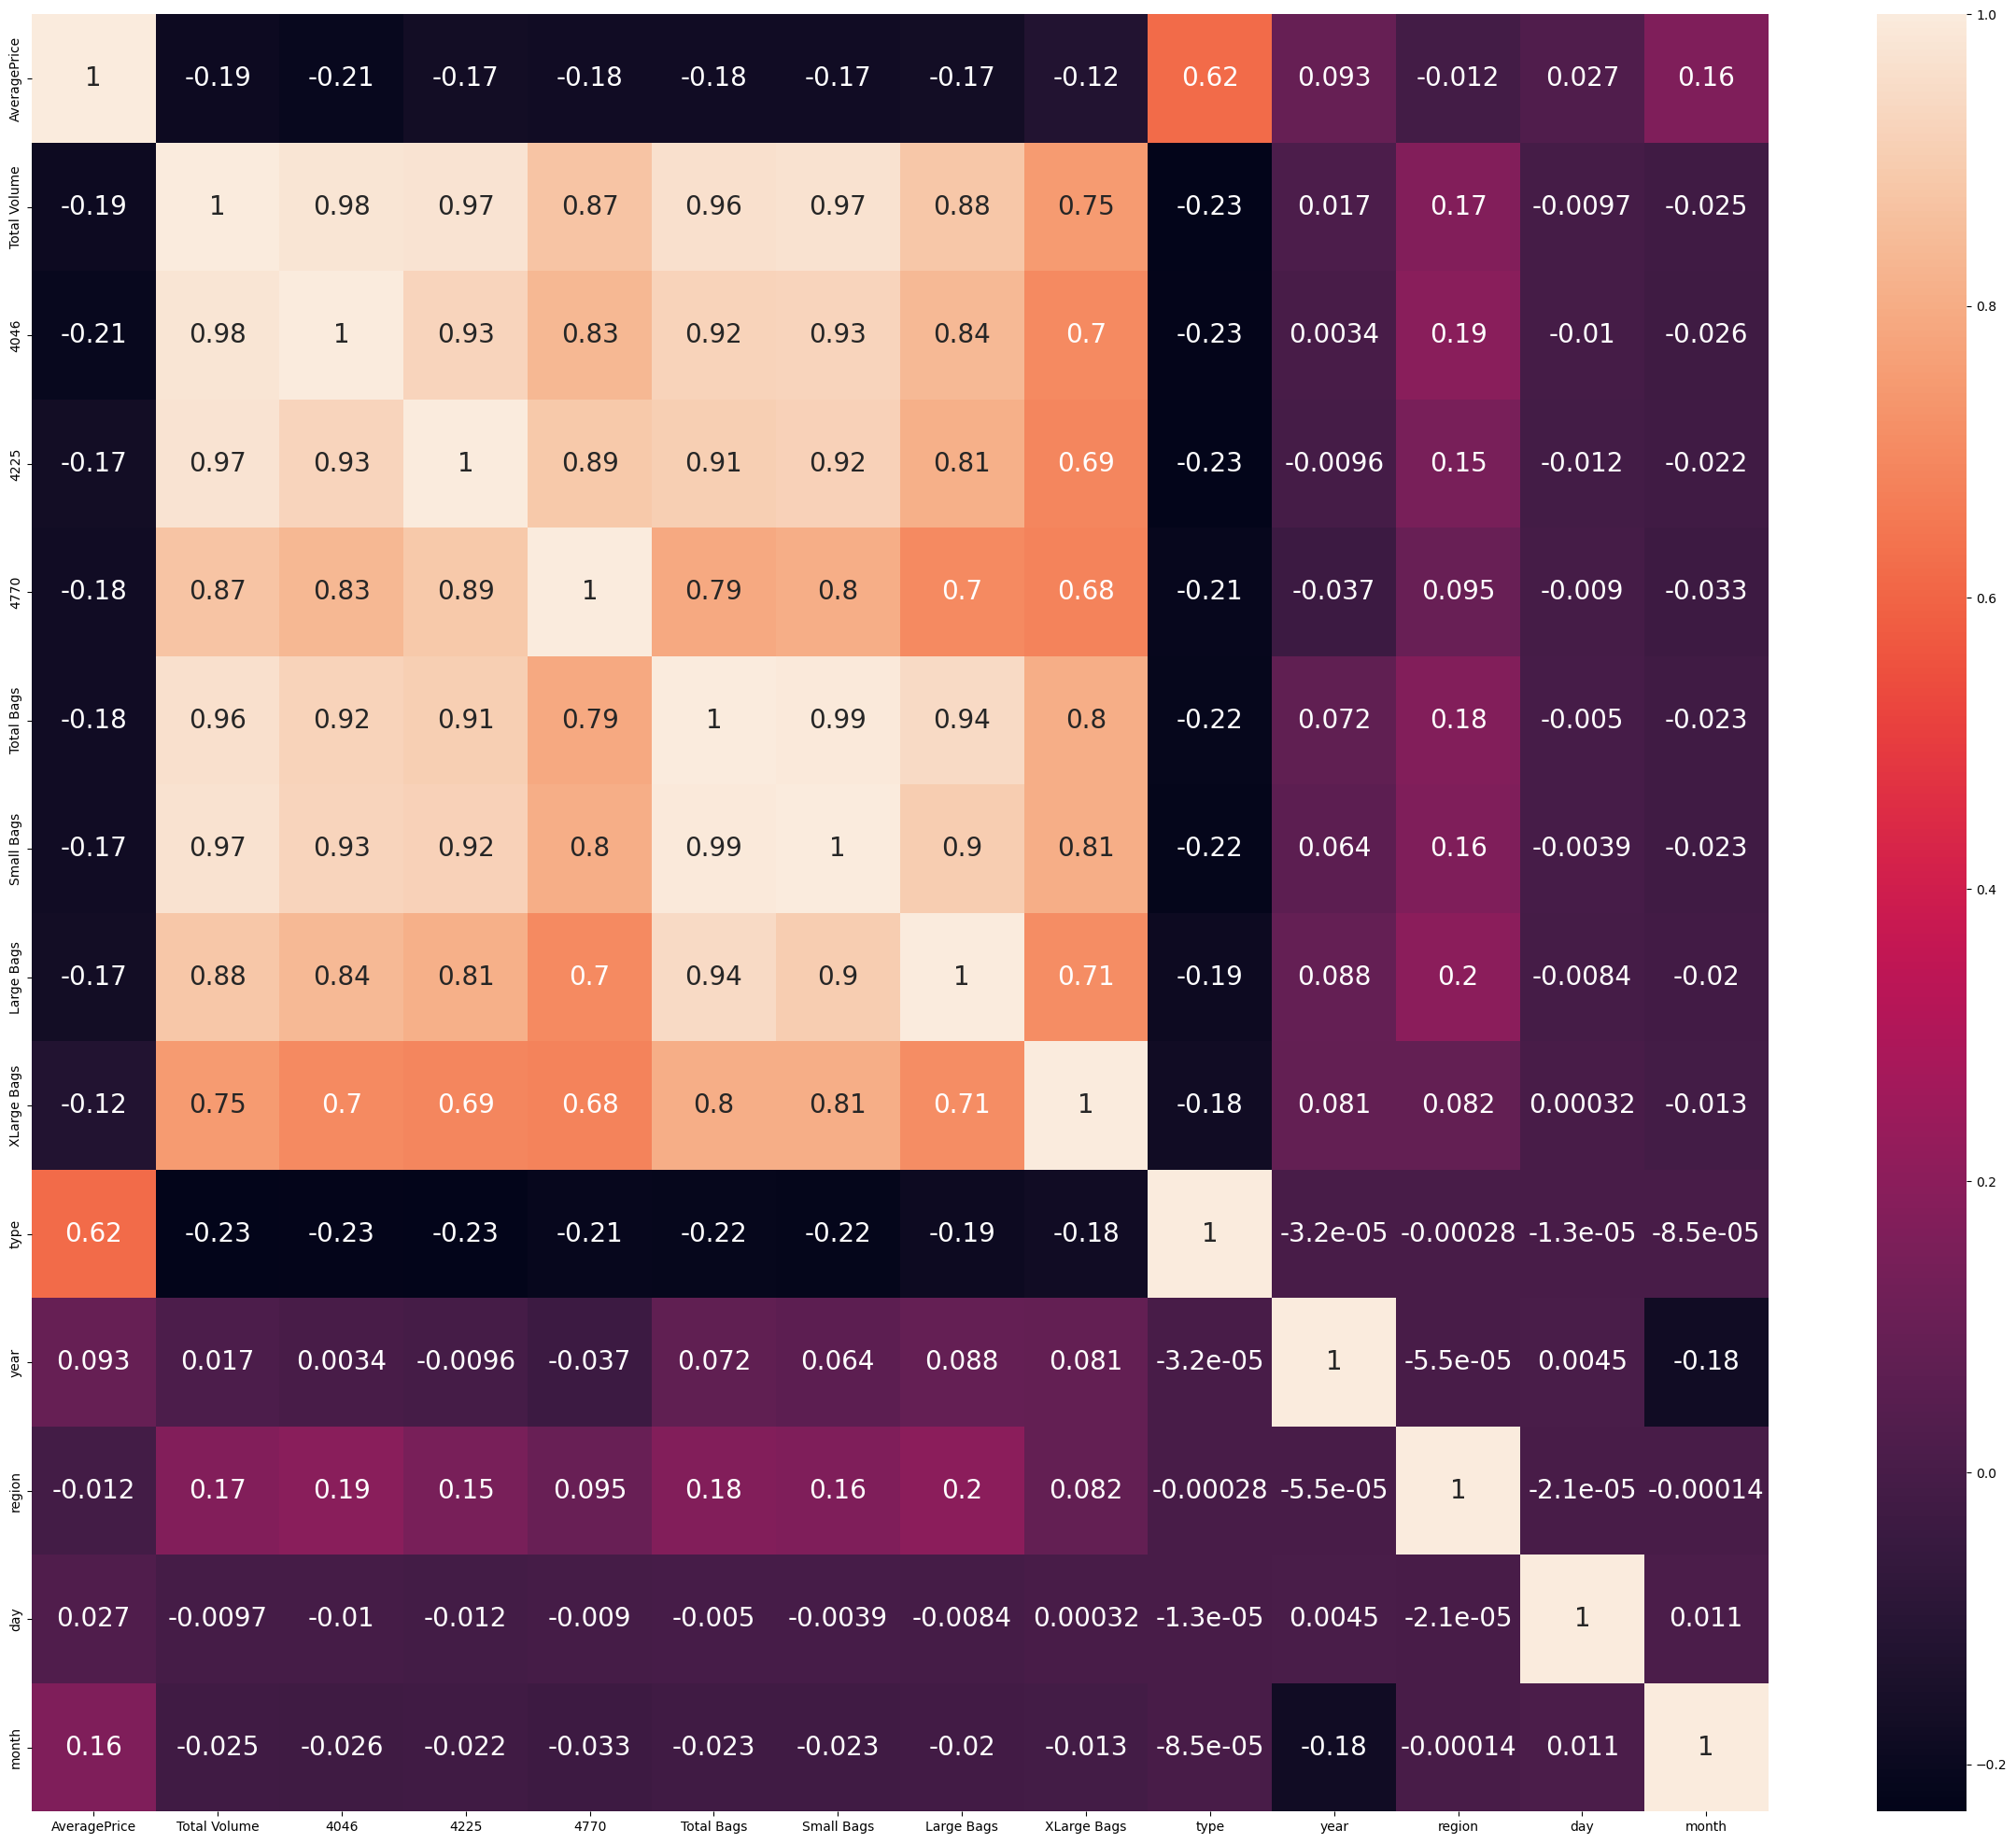

In [49]:
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(),annot=True,annot_kws={'fontsize':20})

In [50]:
df['region'].value_counts()

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
51    338
52    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
53    335
Name: region, dtype: int64

<Axes: xlabel='region', ylabel='Total Volume'>

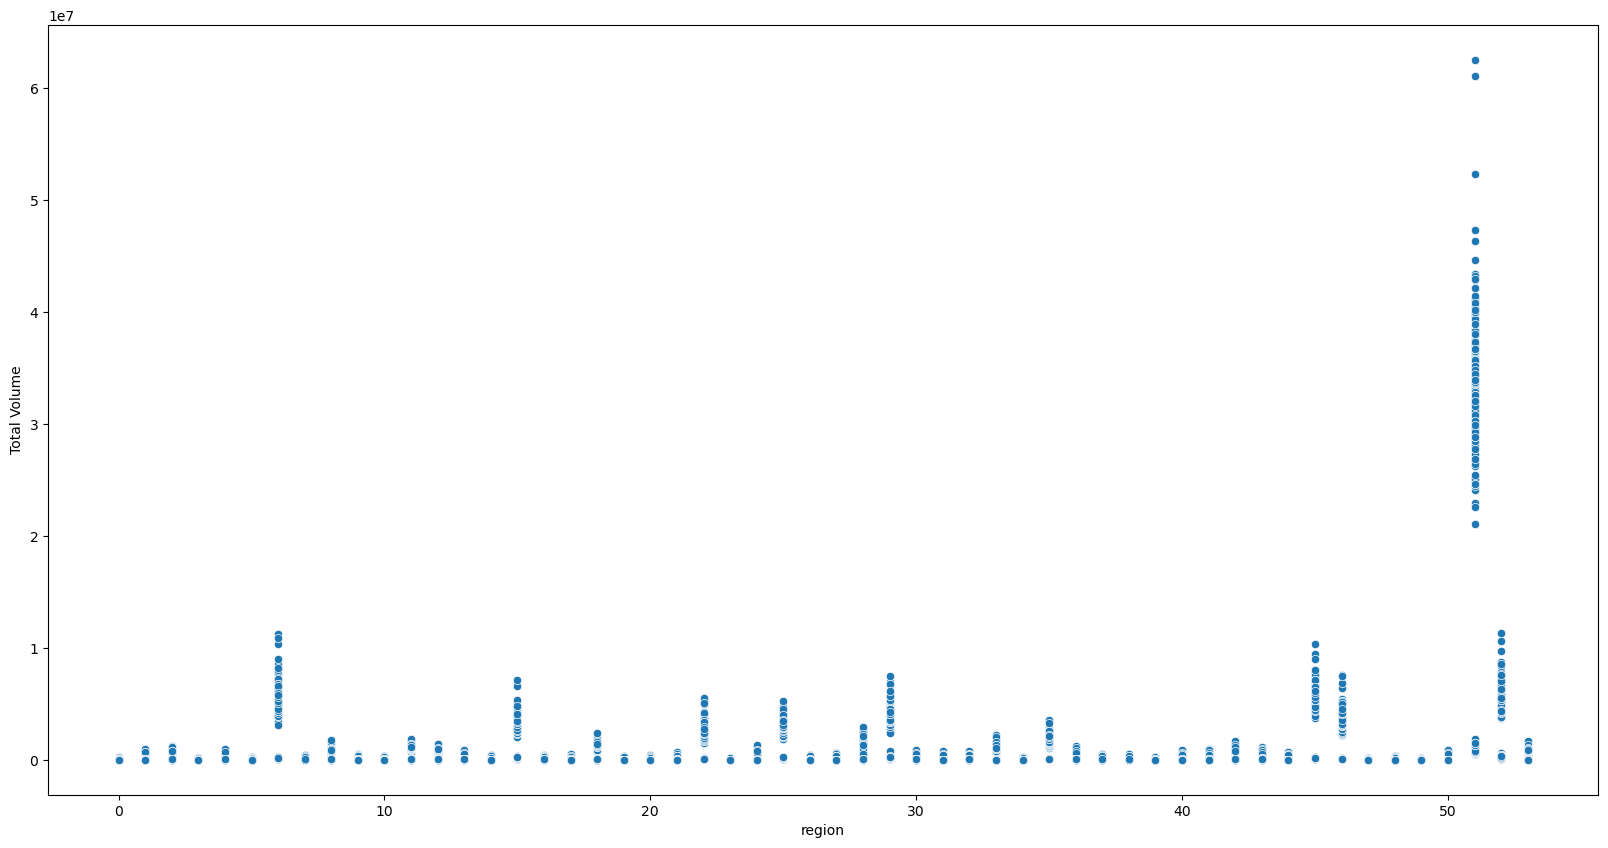

In [51]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='region',y='Total Volume',data=df)

<Axes: xlabel='region', ylabel='AveragePrice'>

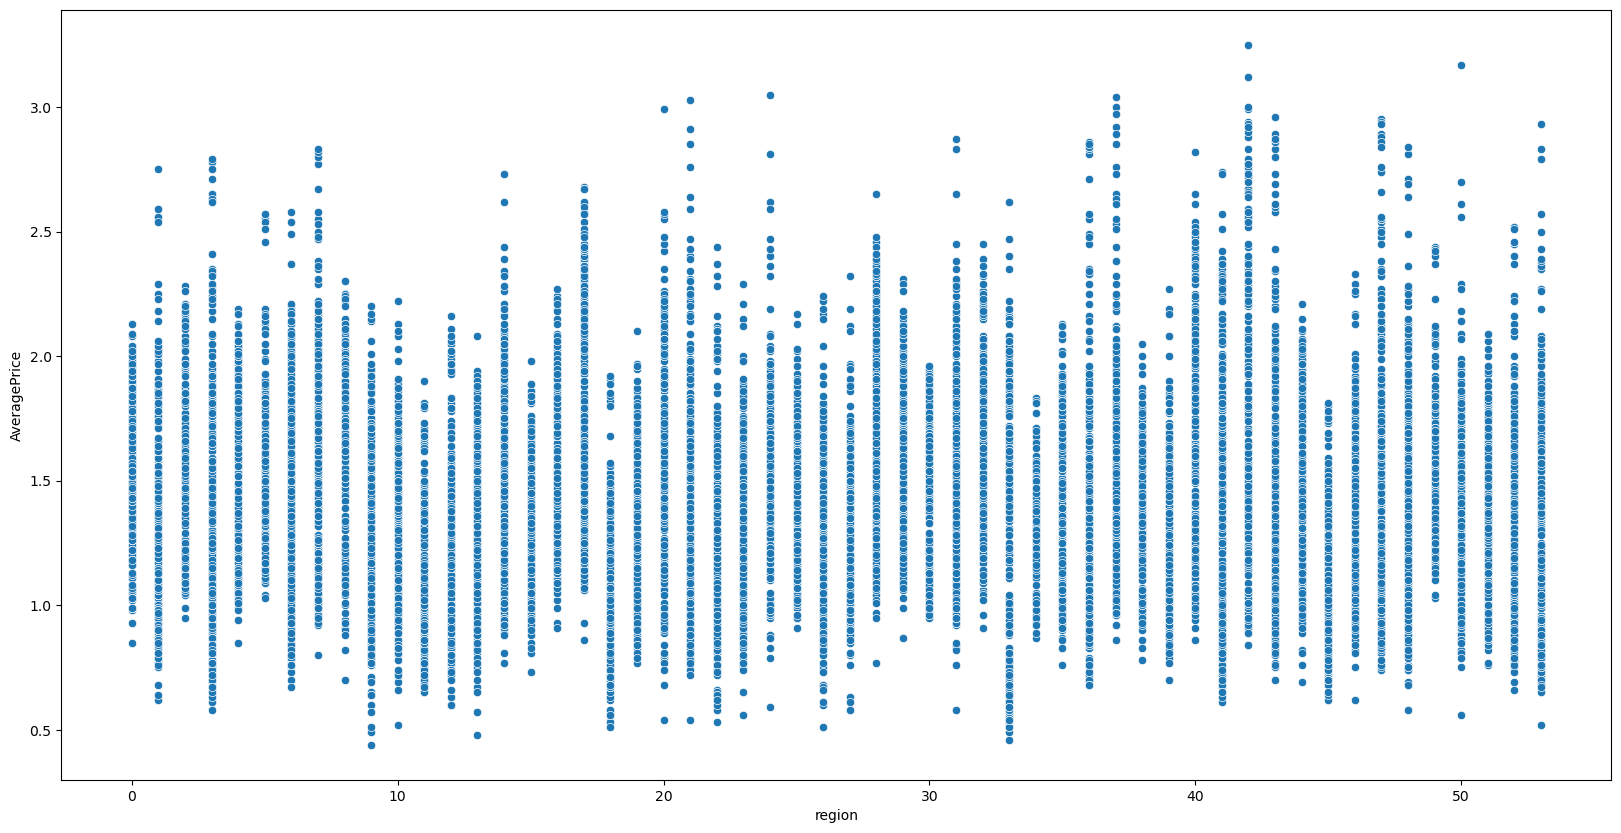

In [52]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='region',y='AveragePrice',data=df)

In [53]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
day              0.014310
month            0.106617
dtype: float64

.

.

.

In [99]:
x=df.drop('region',axis=1)
y=df['region']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30 ,random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train_sca = scaler.transform(x_train)
x_test_sca = scaler.transform(x_test)

x_train_sca= pd.DataFrame(x_train_sca, columns=x_train.columns)
x_test_sca= pd.DataFrame(x_test_sca, columns=x_test.columns)

<Axes: >

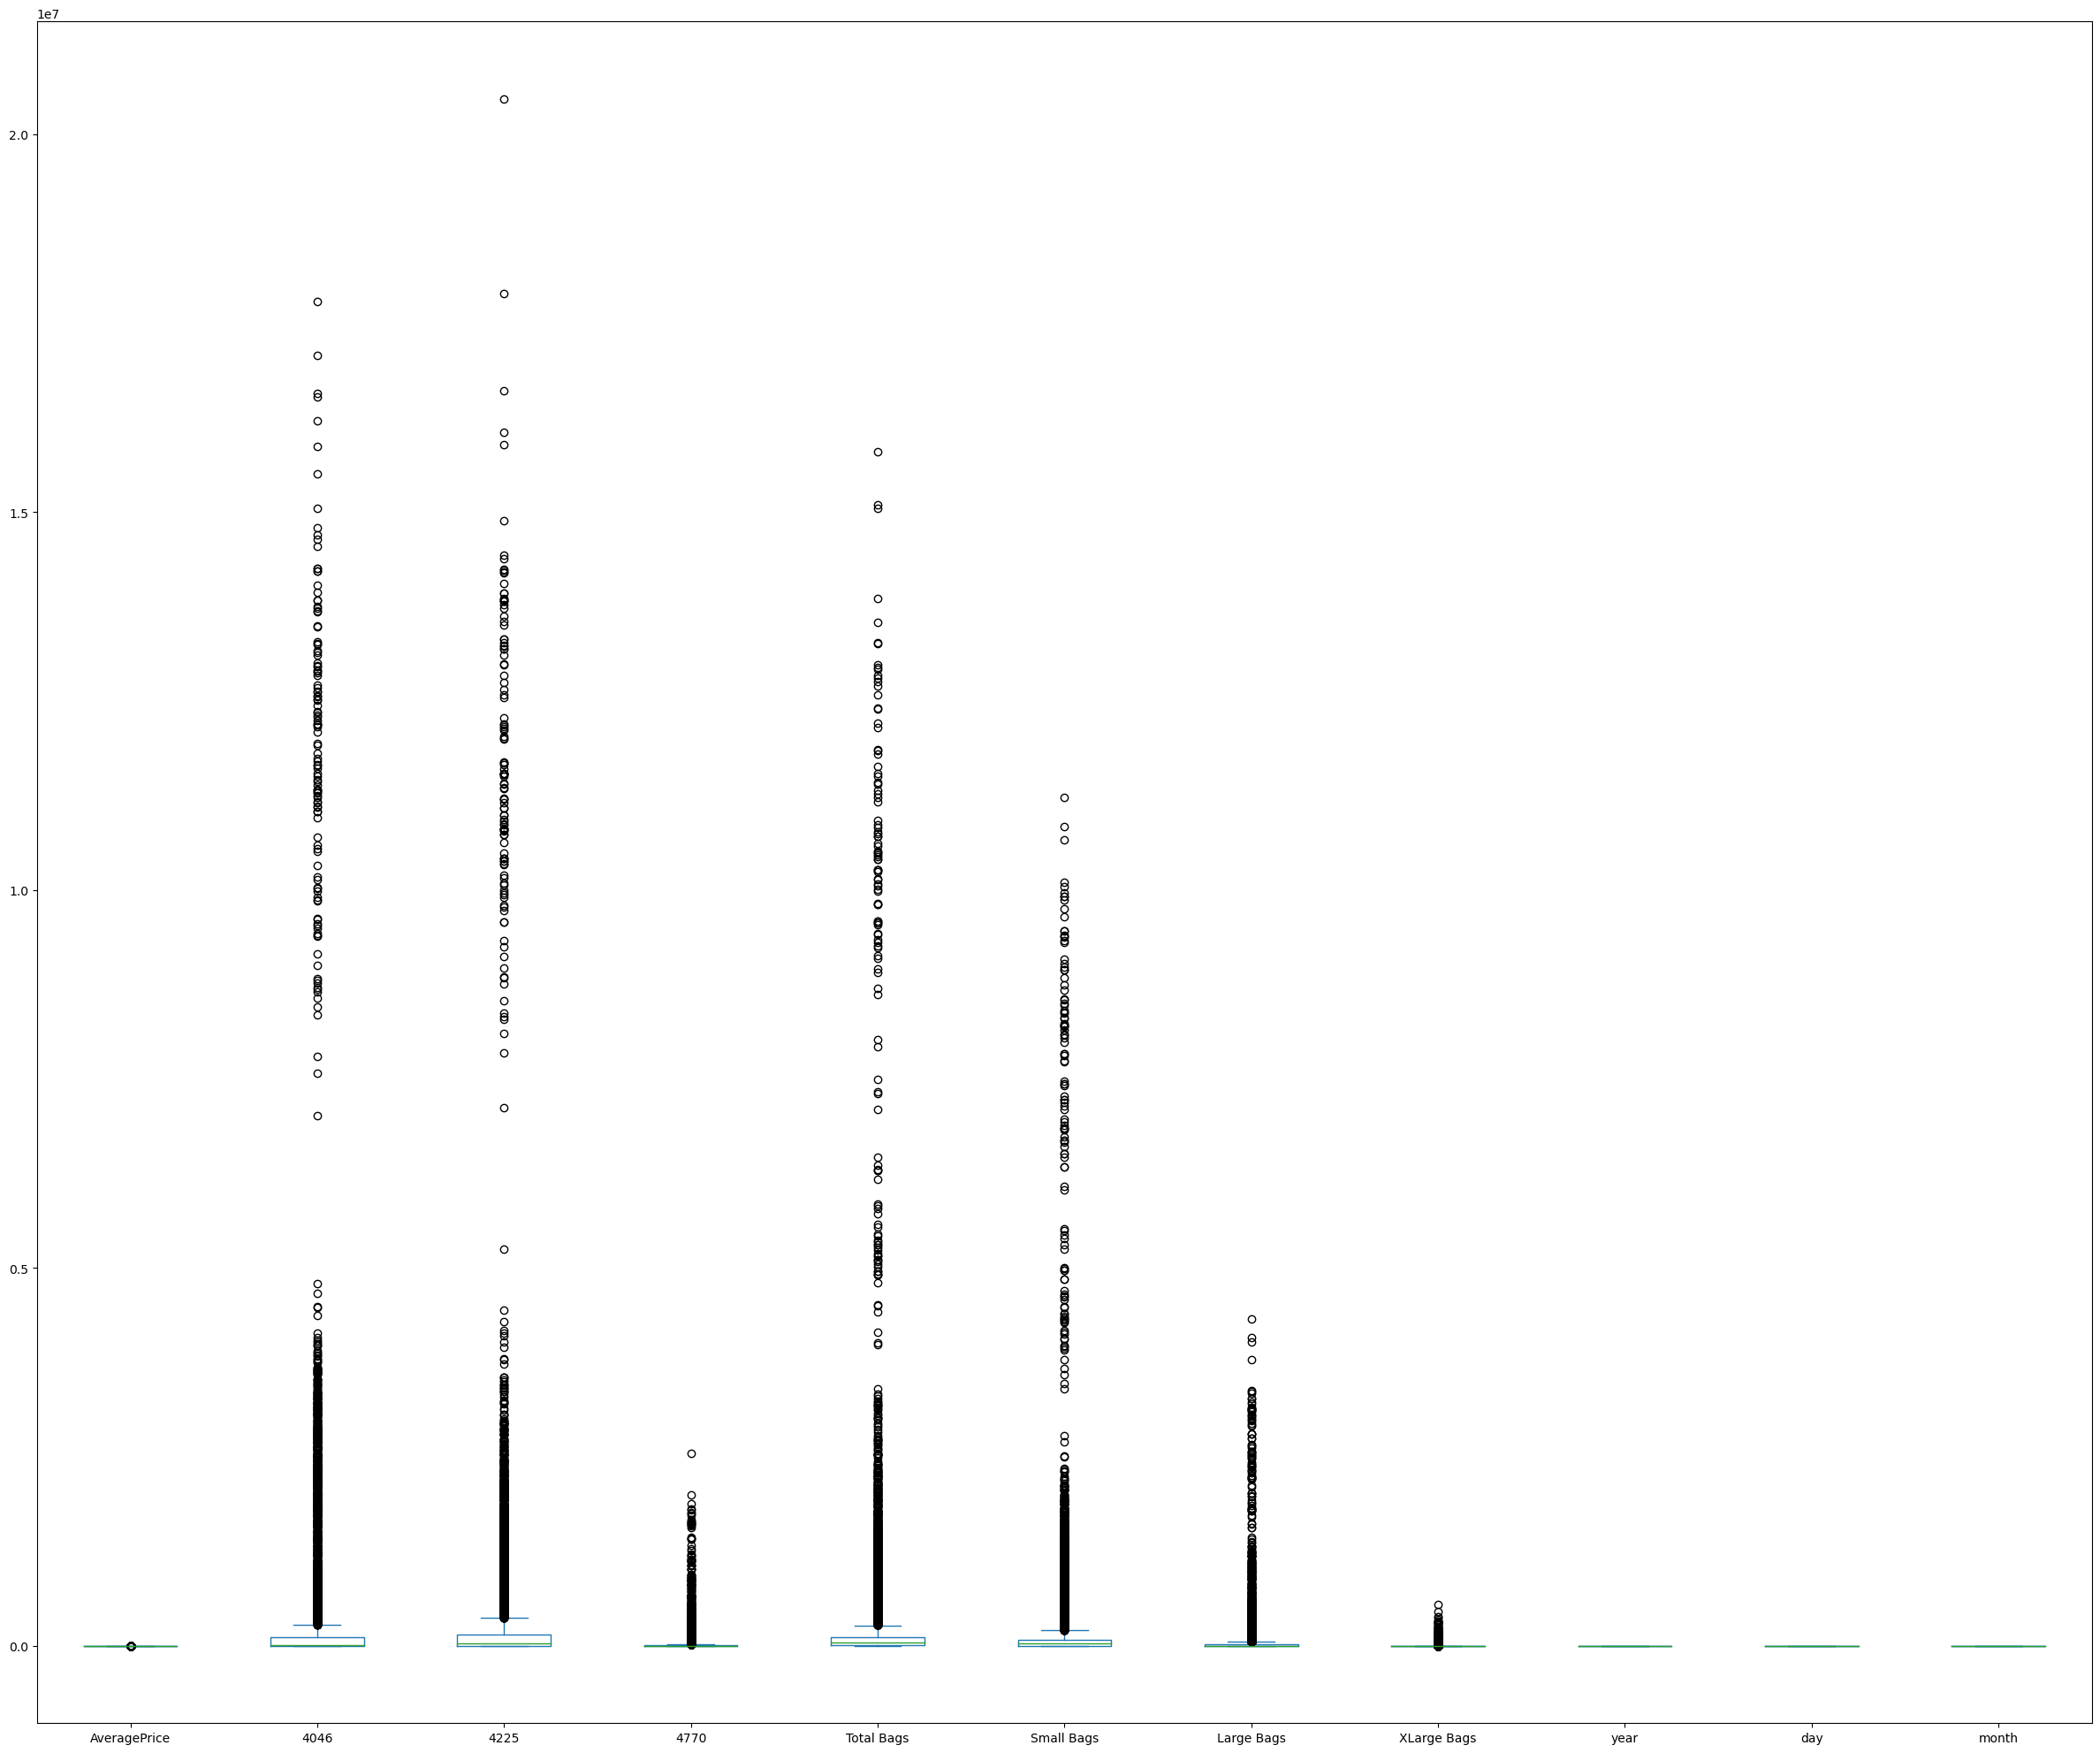

In [100]:
x_train.plot(kind='box',figsize=(30,25))

In [101]:
x_train.describe()

AveragePrice          4046          4225          4770    Total Bags  \
count  12774.000000  1.277400e+04  1.277400e+04  1.277400e+04  1.277400e+04   
mean       1.405398  2.968289e+05  2.973973e+05  2.307094e+04  2.405289e+05   
std        0.403106  1.256147e+06  1.215377e+06  1.097369e+05  9.767171e+05   
min        0.440000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  8.684775e+02  3.007135e+03  0.000000e+00  5.104812e+03   
50%        1.370000  8.952065e+03  2.942765e+04  1.932900e+02  4.065019e+04   
75%        1.660000  1.132389e+05  1.508345e+05  6.242055e+03  1.119585e+05   
max        3.170000  1.778761e+07  2.047057e+07  2.546439e+06  1.580470e+07   

         Small Bags    Large Bags    XLarge Bags          year           day  \
count  1.277400e+04  1.277400e+04   12774.000000  12774.000000  12774.000000   
mean   1.826416e+05  5.470759e+04    3179.740078   2016.148974     15.587365   
std    7.372479e+05  2.427490e+05   18007.714460      0.940886      8.768293   
min    0.000000e+00  0.000000e+00       0.000000   2015.000000      1.000000   
25%    2.905532e+03  1.291425e+02       0.000000   2015.000000      8.000000   
50%    2.677275e+04  2.735810e+03       0.000000   2016.000000     15.000000   
75%    8.375852e+04  2.283427e+04     134.557500   2017.000000     23.000000   
max    1.122805e+07  4.324231e+06  551693.650000   2018.000000     31.000000   

              month  
count  12774.000000  
mean       6.192109  
std        3.532766  
min        1.000000  
25%        3.000000  
50%        6.000000  
75%        9.000000  
max       12.000000

In [102]:
x_test.describe()

AveragePrice          4046          4225          4770    Total Bags  \
count   5475.000000  5.475000e+03  5.475000e+03  5.475000e+03  5.475000e+03   
mean       1.407332  2.840948e+05  2.899218e+05  2.230030e+04  2.375633e+05   
std        0.401706  1.285455e+06  1.177533e+06  1.019721e+05  1.008204e+06   
min        0.490000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  8.247850e+02  3.011515e+03  0.000000e+00  5.008000e+03   
50%        1.380000  7.965620e+03  2.826318e+04  1.693800e+02  3.846754e+04   
75%        1.660000  1.063057e+05  1.477834e+05  6.241800e+03  1.091606e+05   
max        3.250000  2.274362e+07  2.044550e+07  1.896150e+06  1.937313e+07   

         Small Bags    Large Bags    XLarge Bags         year          day  \
count  5.475000e+03  5.475000e+03    5475.000000  5475.000000  5475.000000   
mean   1.811520e+05  5.347598e+04    2935.374899  2016.145388    15.838174   
std    7.666779e+05  2.468021e+05   16936.005404     0.937806     8.793189   
min    0.000000e+00  0.000000e+00       0.000000  2015.000000     1.000000   
25%    2.739770e+03  1.250800e+02       0.000000  2015.000000     8.000000   
50%    2.519497e+04  2.503810e+03       0.000000  2016.000000    16.000000   
75%    8.277961e+04  2.065379e+04     129.860000  2017.000000    24.000000   
max    1.338459e+07  5.719097e+06  390478.730000  2018.000000    31.000000   

             month  
count  5475.000000  
mean      6.142466  
std       3.537390  
min       1.000000  
25%       3.000000  
50%       6.000000  
75%       9.000000  
max      12.000000

.

.

In [103]:
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier , BaggingClassifier , RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score

.

0.09150684931506849
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.00      0.00      0.00       103
           2       0.14      0.53      0.22        95
           3       0.00      0.00      0.00        98
           4       0.06      0.24      0.10       104
           5       0.00      0.00      0.00       109
           6       0.00      0.00      0.00        99
           7       0.00      0.00      0.00       113
           8       0.00      0.00      0.00       105
           9       0.00      0.00      0.00       109
          10       0.00      0.00      0.00       104
          11       0.00      0.00      0.00       103
          12       0.50      0.02      0.04        96
          13       0.00      0.00      0.00       102
          14       0.00      0.00      0.00        99
          15       0.00      0.00      0.00       108
          16       0.67      0.42      0.52       109
       

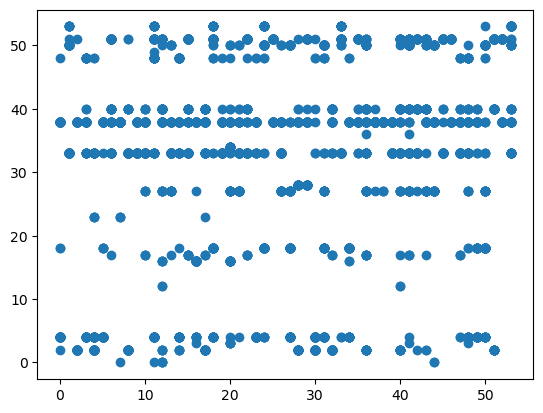

In [104]:
abc =AdaBoostClassifier()
abc.fit(x_train_sca,y_train)
abcy_pred = abc.predict(x_test_sca)

print(accuracy_score(y_test,abcy_pred))
print(classification_report(y_test,abcy_pred))

recheck = cross_val_score(abc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,abcy_pred) - recheck.mean())

plt.scatter(x=y_test,y=abcy_pred)

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train_sca,y_train)
gbcy_pred = gbc.predict(x_test_sca)

print(accuracy_score(y_test,gbcy_pred))
print(classification_report(y_test,gbcy_pred))

recheck = cross_val_score(gbc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,gbcy_pred) - recheck.mean())

plt.scatter(x=y_test,y=gbcy_pred)

0.3059360730593607
              precision    recall  f1-score   support

           0       0.14      0.33      0.20        96
           1       0.34      0.22      0.27       103
           2       0.63      0.40      0.49        95
           3       0.58      0.34      0.43        98
           4       0.47      0.26      0.33       104
           5       0.30      0.23      0.26       109
           6       0.64      0.38      0.48        99
           7       0.91      0.27      0.42       113
           8       0.78      0.47      0.58       105
           9       0.82      0.38      0.52       109
          10       0.53      0.16      0.25       104
          11       0.26      0.05      0.08       103
          12       0.48      0.43      0.45        96
          13       0.55      0.27      0.37       102
          14       0.79      0.27      0.41        99
          15       0.87      0.43      0.57       108
          16       0.42      0.41      0.42       109
        

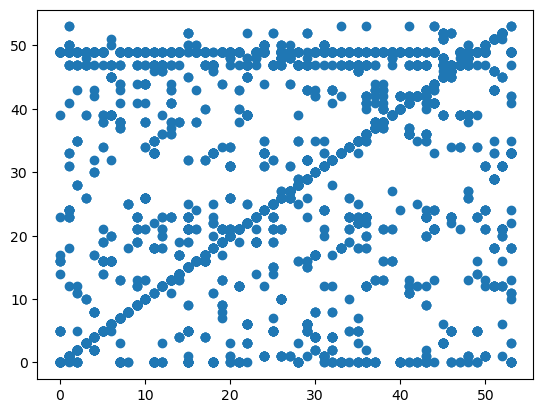

In [91]:
gs = GaussianNB()
gs.fit(x_train_sca,y_train)
gsy_pred = gs.predict(x_test_sca)

print(accuracy_score(y_test,gsy_pred))
print(classification_report(y_test,gsy_pred))

recheck = cross_val_score(gs,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,gsy_pred) - recheck.mean())

plt.scatter(x=y_test,y=gsy_pred)

0.9053881278538812
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        96
           1       0.84      0.84      0.84       103
           2       0.96      0.99      0.97        95
           3       0.88      0.85      0.86        98
           4       0.93      0.97      0.95       104
           5       0.89      0.85      0.87       109
           6       0.98      1.00      0.99        99
           7       0.92      0.88      0.90       113
           8       0.96      0.97      0.97       105
           9       0.93      0.90      0.92       109
          10       0.85      0.85      0.85       104
          11       0.96      0.95      0.96       103
          12       0.94      0.96      0.95        96
          13       0.86      0.84      0.85       102
          14       0.91      0.95      0.93        99
          15       0.95      0.96      0.96       108
          16       0.97      0.93      0.95       109
        

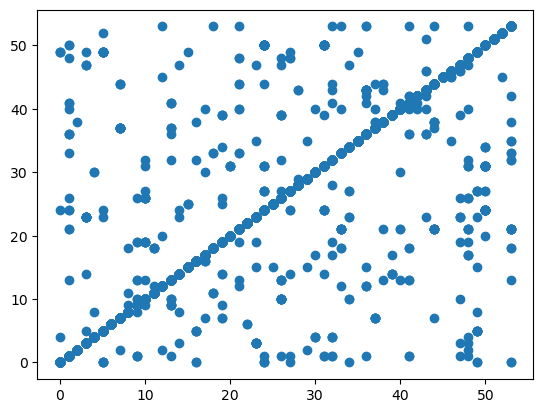

In [105]:
rfc= RandomForestClassifier()
rfc.fit(x_train_sca,y_train)
rfcy_pred = rfc.predict(x_test_sca)

print(accuracy_score(y_test,rfcy_pred))
print(classification_report(y_test,rfcy_pred))

recheck = cross_val_score(rfc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,rfcy_pred) - recheck.mean())

plt.scatter(x=y_test,y=rfcy_pred)

0.8695890410958904
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        96
           1       0.84      0.89      0.86       103
           2       0.94      0.97      0.95        95
           3       0.88      0.80      0.83        98
           4       0.90      0.92      0.91       104
           5       0.87      0.83      0.85       109
           6       0.94      0.95      0.94        99
           7       0.89      0.82      0.86       113
           8       0.95      0.97      0.96       105
           9       0.89      0.85      0.87       109
          10       0.84      0.81      0.82       104
          11       0.94      0.89      0.92       103
          12       0.93      0.91      0.92        96
          13       0.88      0.79      0.84       102
          14       0.89      0.93      0.91        99
          15       0.94      0.94      0.94       108
          16       0.97      0.88      0.92       109
        

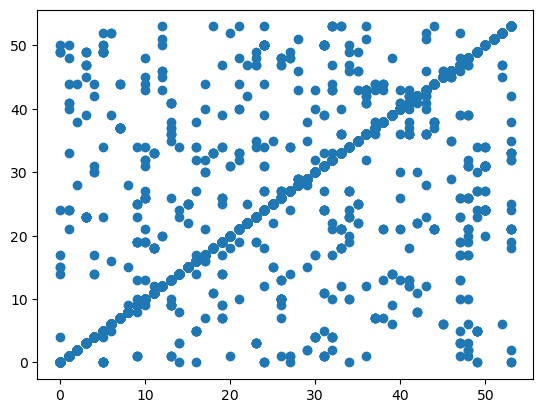

In [107]:
rfc= RandomForestClassifier(max_samples=0.75,max_depth=50,
            max_features=15,
            min_samples_split=4,
            n_estimators=300,criterion='entropy',random_state=42)
rfc.fit(x_train_sca,y_train)
rfcy_pred = rfc.predict(x_test_sca)

print(accuracy_score(y_test,rfcy_pred))
print(classification_report(y_test,rfcy_pred))

recheck = cross_val_score(rfc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,rfcy_pred) - recheck.mean())

plt.scatter(x=y_test,y=rfcy_pred)

0.8467579908675799
              precision    recall  f1-score   support

           0       0.83      0.89      0.85        96
           1       0.76      0.82      0.79       103
           2       0.84      0.97      0.90        95
           3       0.81      0.81      0.81        98
           4       0.87      0.94      0.90       104
           5       0.79      0.81      0.80       109
           6       0.89      0.94      0.92        99
           7       0.82      0.88      0.85       113
           8       0.95      0.96      0.96       105
           9       0.88      0.89      0.89       109
          10       0.78      0.74      0.76       104
          11       0.90      0.91      0.90       103
          12       0.90      0.89      0.89        96
          13       0.76      0.77      0.77       102
          14       0.86      0.89      0.88        99
          15       0.92      0.95      0.94       108
          16       0.93      0.85      0.89       109
        

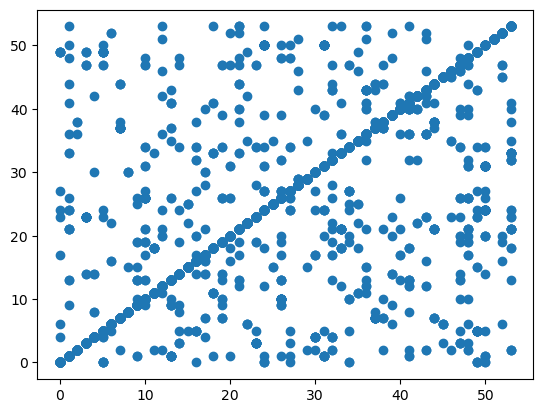

In [93]:
bc = BaggingClassifier()
bc.fit(x_train_sca,y_train)
bcy_pred = bc.predict(x_test_sca)

print(accuracy_score(y_test,bcy_pred))
print(classification_report(y_test,bcy_pred))

recheck = cross_val_score(bc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,bcy_pred) - recheck.mean())

plt.scatter(x=y_test,y=bcy_pred)

              precision    recall  f1-score   support

           0       0.06      0.29      0.09        96
           1       0.26      0.18      0.21       103
           2       0.41      0.47      0.44        95
           3       0.05      0.15      0.08        98
           4       0.30      0.28      0.29       104
           5       0.09      0.01      0.02       109
           6       0.81      0.39      0.53        99
           7       0.07      0.02      0.03       113
           8       0.79      0.50      0.62       105
           9       0.28      0.44      0.34       109
          10       0.17      0.13      0.15       104
          11       0.20      0.29      0.24       103
          12       0.41      0.43      0.42        96
          13       0.47      0.26      0.34       102
          14       0.41      0.17      0.24        99
          15       0.92      0.43      0.58       108
          16       0.50      0.06      0.10       109
          17       0.03    

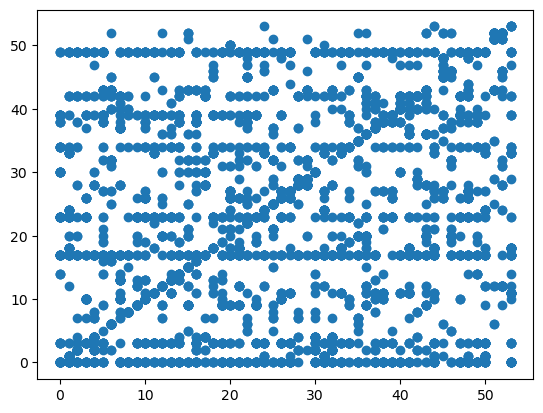

In [94]:
lr = LogisticRegression()
lr.fit(x_train_sca,y_train)
lry_pred = lr.predict(x_test_sca)

print(classification_report(y_test,lry_pred))

recheck = cross_val_score(lr,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,lry_pred) - recheck.mean())

plt.scatter(x=y_test,y=lry_pred)

0.7828310502283105
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        96
           1       0.71      0.68      0.70       103
           2       0.84      0.95      0.89        95
           3       0.76      0.74      0.75        98
           4       0.84      0.86      0.85       104
           5       0.69      0.77      0.73       109
           6       0.93      0.94      0.93        99
           7       0.89      0.79      0.84       113
           8       0.93      0.95      0.94       105
           9       0.78      0.76      0.77       109
          10       0.69      0.62      0.65       104
          11       0.82      0.83      0.83       103
          12       0.81      0.81      0.81        96
          13       0.70      0.68      0.69       102
          14       0.82      0.81      0.81        99
          15       0.92      0.86      0.89       108
          16       0.89      0.85      0.87       109
        

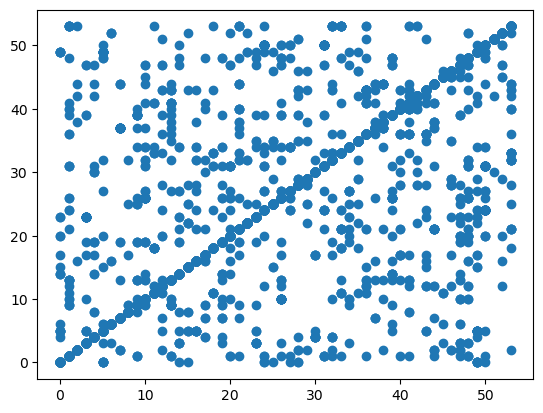

In [95]:
dtc= DecisionTreeClassifier()
dtc.fit(x_train_sca,y_train)
dtcy_pred = dtc.predict(x_test_sca)

print(accuracy_score(y_test,dtcy_pred))
print(classification_report(y_test,dtcy_pred))

recheck = cross_val_score(dtc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,dtcy_pred) - recheck.mean())

plt.scatter(x=y_test,y=dtcy_pred)

0.2149771689497717
              precision    recall  f1-score   support

           0       0.04      0.27      0.07        96
           1       0.26      0.11      0.15       103
           2       0.37      0.51      0.43        95
           3       0.00      0.00      0.00        98
           4       0.25      0.08      0.12       104
           5       0.14      0.01      0.02       109
           6       0.94      0.47      0.63        99
           7       0.00      0.00      0.00       113
           8       0.93      0.51      0.66       105
           9       0.13      0.30      0.18       109
          10       0.04      0.11      0.06       104
          11       0.59      0.29      0.39       103
          12       0.72      0.45      0.55        96
          13       0.68      0.23      0.34       102
          14       0.62      0.10      0.17        99
          15       0.96      0.44      0.60       108
          16       0.00      0.00      0.00       109
        

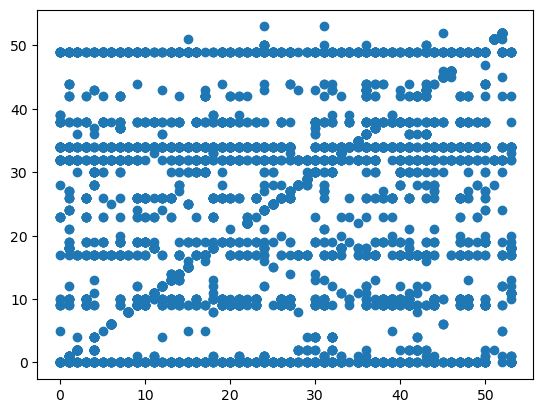

In [96]:
model= SVC()
model.fit(x_train_sca,y_train)
modely_pred = model.predict(x_test_sca)

print(accuracy_score(y_test,modely_pred))
print(classification_report(y_test,modely_pred))

recheck = cross_val_score(model,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,modely_pred) - recheck.mean())

plt.scatter(x=y_test,y=modely_pred)

.

# RandomForestClassifier is the best performing

In [108]:
average_price = pd.DataFrame({'Test':y_test,'Prediction':rfcy_pred})
average_price.head(50)

Test  Prediction
8604     10          10
2608     50          31
14581    50          24
4254     27          27
16588    34          34
13954    38          38
17460    51          51
5504     51          51
17253    47          47
7801     41          41
3857     20          20
12571    12          12
852      16          16
11474    45          45
3502     13          13
13825    36          36
12599    12          46
13505    30          30
4220     27          48
3753     18          33
16452    32          32
12401     9           9
8610     11          11
11570    47          23
16987    42          42
17843    20          20
8000     44          21
10411    24          31
11434    44          44
5025     42          42
14343    46          46
10319    22          22
17303    48          17
9341      4           4
7439     34          34
7058     27          27
14711    53          53
13328    26          26
13631    32          53
16793    38          38
2167     41          41
17161    45          45
8922     37          37
10909    34          34
5309     48          48
708      13          13
326       6           6
10764    31          31
7021     26          26
6850     23          23